In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [7]:
df = pd.read_csv("../data/coches_consolidado_limpio.csv")

In [8]:
df['nombre_vendedor'] = df['nombre_vendedor'].str.replace('\r', '', regex=False)
df

modelo_titulo  provincia  \
0              XC40 D4 R-Design Premium Edition AWD Aut.     Madrid   
1          Clase GLC Todoterreno Automático de 5 Puertas     Málaga   
2                       C5 X 1.6 Puretech Shine EAT8 180     Burgos   
3                               Avenger 1.2 Altitude 100  Castellón   
4      XF 3.0 V6 238cv Luxury 4p Auto #LIBRO, NAVY, C...     Madrid   
...                                                  ...        ...   
17513                             Forfour Electric Drive     Madrid   
17514                                  C-HR 125H Advance     Málaga   
17515                      500 1.0 Hybrid Dolcevita 52kW     Madrid   
17516                             C-HR 200H GR Sport AWD     Málaga   
17517                       Yaris Cross 120H Active Tech     Madrid   

       kilometraje         combustible distintivo_ambiental  garantia  \
0           115000              Diésel                    C      12.0   
1            15000  Híbrido Enchufable          0 EMISIONES      12.0   
2            36777            Gasolina                    C      16.0   
3            27955            Gasolina                    C      24.0   
4           240000              Diésel                    B      16.0   
...            ...                 ...                  ...       ...   
17513       114000           Eléctrico          0 EMISIONES      12.0   
17514        84214             Híbrido                  ECO      12.0   
17515        23675            Gasolina                  ECO      12.0   
17516        29990             Híbrido                  ECO      12.0   
17517            3             Híbrido                  ECO      12.0   

       cambio_automatico         carroceria  plazas  potencia  ...  \
0                   True       Todo Terreno     5.0     190.0  ...   
1                   True  4x4, SUV o pickup     5.0     330.0  ...   
2                   True            Berlina     5.0     180.0  ...   
3                  False       Todo Terreno     5.0     100.0  ...   
4                   True            Berlina     NaN     240.0  ...   
...                  ...                ...     ...       ...  ...   
17513               True            Berlina     4.0      82.0  ...   
17514               True       Todo Terreno     5.0     122.0  ...   
17515              False            Berlina     4.0      70.0  ...   
17516               True       Todo Terreno     5.0     196.0  ...   
17517               True       Todo Terreno     5.0     116.0  ...   

                 fecha_extraccion referencia  \
0      2025-03-01 00:25:18.743257   15483995   
1      2025-03-01 00:25:28.131080   15509915   
2      2025-03-01 00:25:38.452217   14540815   
3      2025-03-01 00:25:49.006877   14746062   
4      2025-03-01 00:25:57.459942   15506907   
...                           ...        ...   
17513  2025-02-28 23:34:56.376648   15052247   
17514  2025-02-28 23:35:05.784176   15308598   
17515  2025-02-28 23:35:24.339817   15503872   
17516  2025-02-28 23:35:33.056542   15185832   
17517  2025-02-28 23:36:15.487705   15505358   

                                                     url  \
0      https://www.autocasion.com/coches-segunda-mano...   
1      https://www.autocasion.com/coches-segunda-mano...   
2      https://www.autocasion.com/coches-segunda-mano...   
3      https://www.autocasion.com/coches-segunda-mano...   
4      https://www.autocasion.com/coches-segunda-mano...   
...                                                  ...   
17513  https://www.autocasion.com/coches-segunda-mano...   
17514  https://www.autocasion.com/coches-segunda-mano...   
17515  https://www.autocasion.com/coches-segunda-mano...   
17516  https://www.autocasion.com/coches-segunda-mano...   
17517  https://www.autocasion.com/coches-km0/km-0/toy...   

                                             ruta_imagen     marca_sola  \
0      img/coches/a508e653e25158ab5839cd873091777bd18...          VOLVO   
1      img/coches/fa24e8

Transformaciones a las categorias

In [9]:
df["carroceria"].unique()

array(['Todo Terreno', '4x4, SUV o pickup', 'Berlina', 'Familiar',
       'Deportivo o coupé', 'Pequeño', 'Descapotable o convertible',
       'Monovolumen', nan], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17518 entries, 0 to 17517
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo_titulo         17518 non-null  object 
 1   provincia             17518 non-null  object 
 2   kilometraje           17518 non-null  int64  
 3   combustible           17385 non-null  object 
 4   distintivo_ambiental  16092 non-null  object 
 5   garantia              17518 non-null  float64
 6   cambio_automatico     17518 non-null  bool   
 7   carroceria            17502 non-null  object 
 8   plazas                12015 non-null  float64
 9   potencia              17428 non-null  float64
 10  puertas               17518 non-null  int64  
 11  color                 17518 non-null  object 
 12  precio                17513 non-null  float64
 13  vendedor_profesional  17518 non-null  bool   
 14  consumo_medio         7052 non-null   float64
 15  certificado        

## Relación de variables entre si

In [11]:
columnas_categoricas = ['distintivo_ambiental', 'garantia', 'carroceria', 'plazas', 'puertas', 'consumo_medio', 'vendedor_profesional']

In [12]:
def formatear_texto(columna):
    return columna.replace('_', ' ').title()

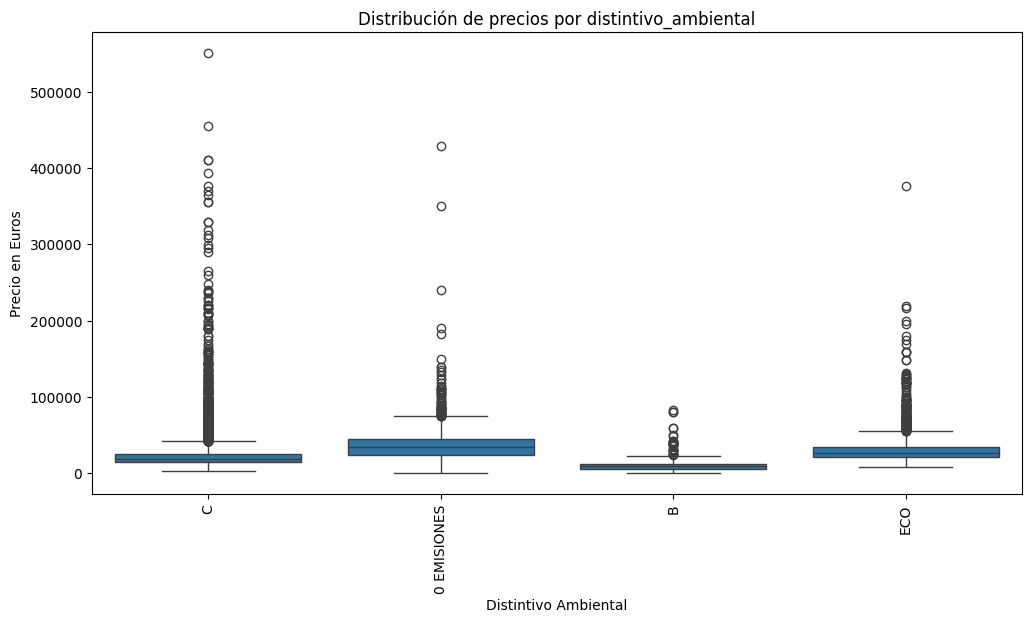

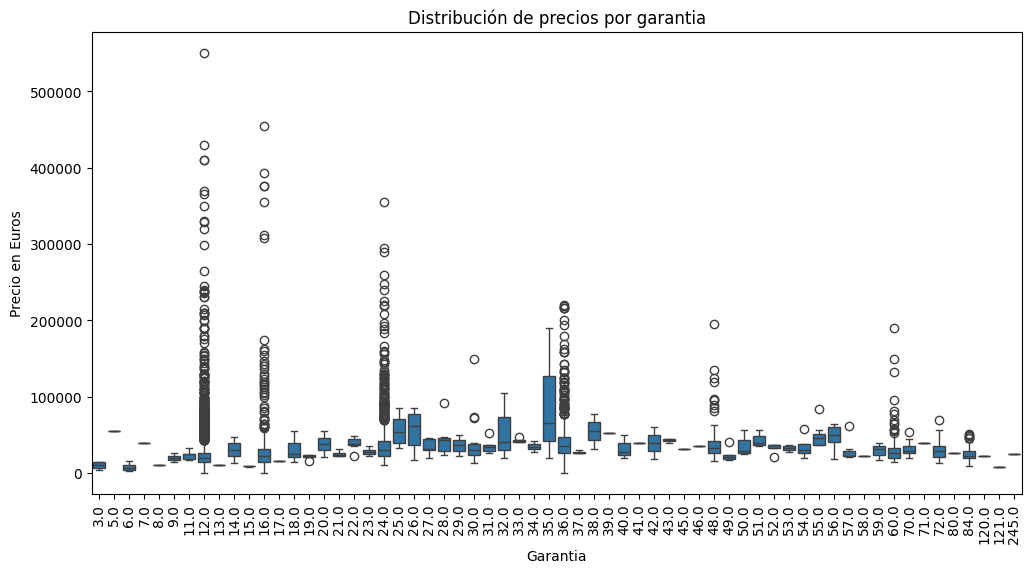

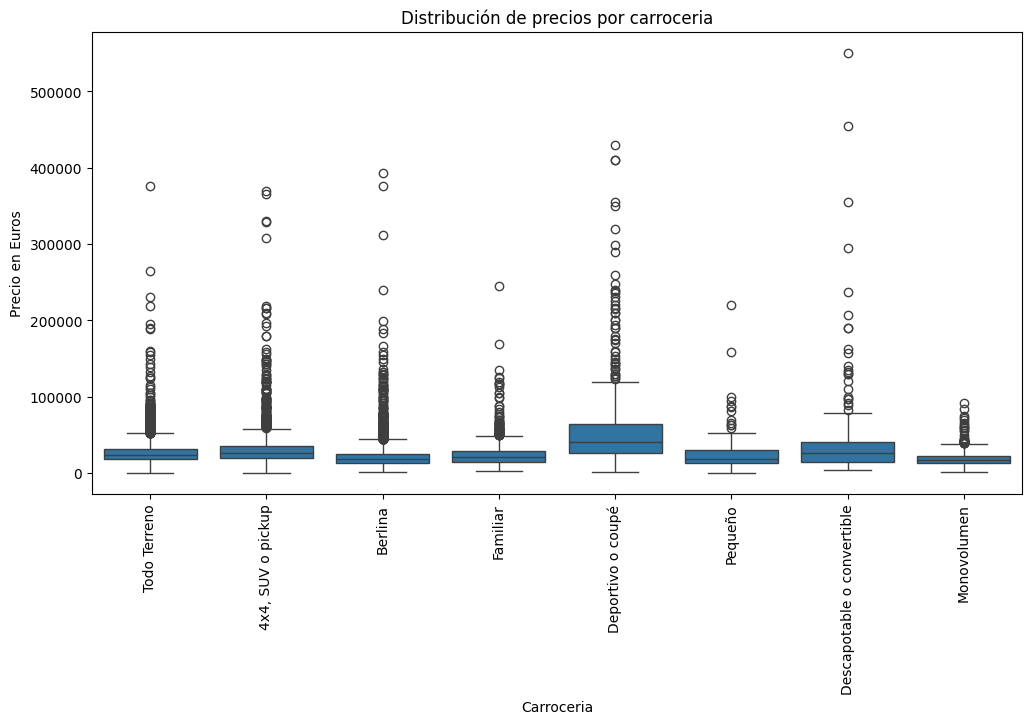

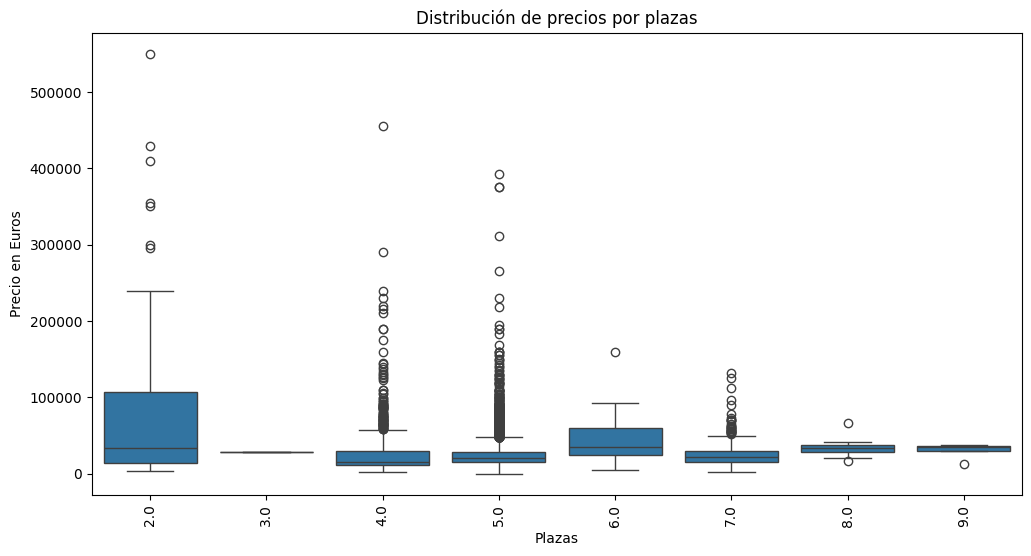

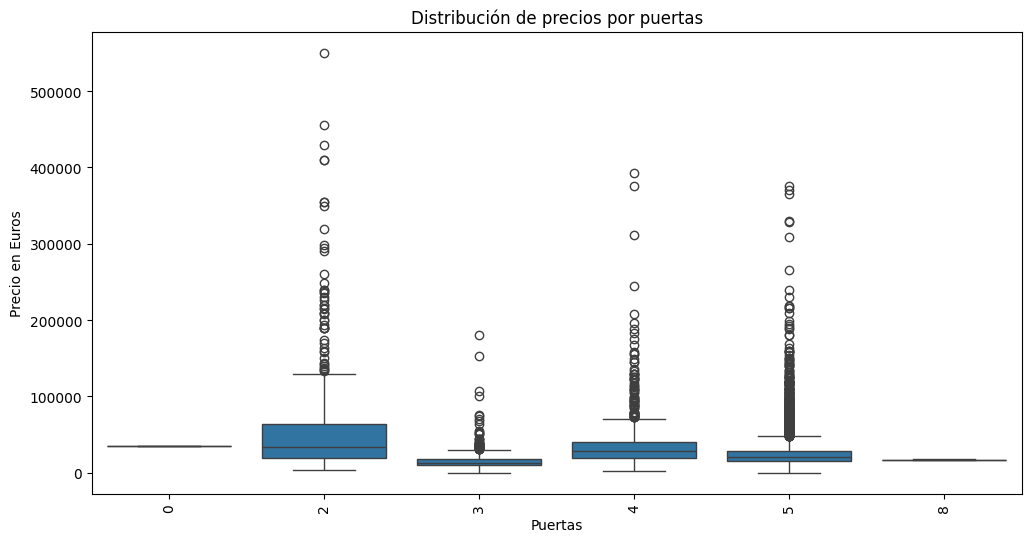

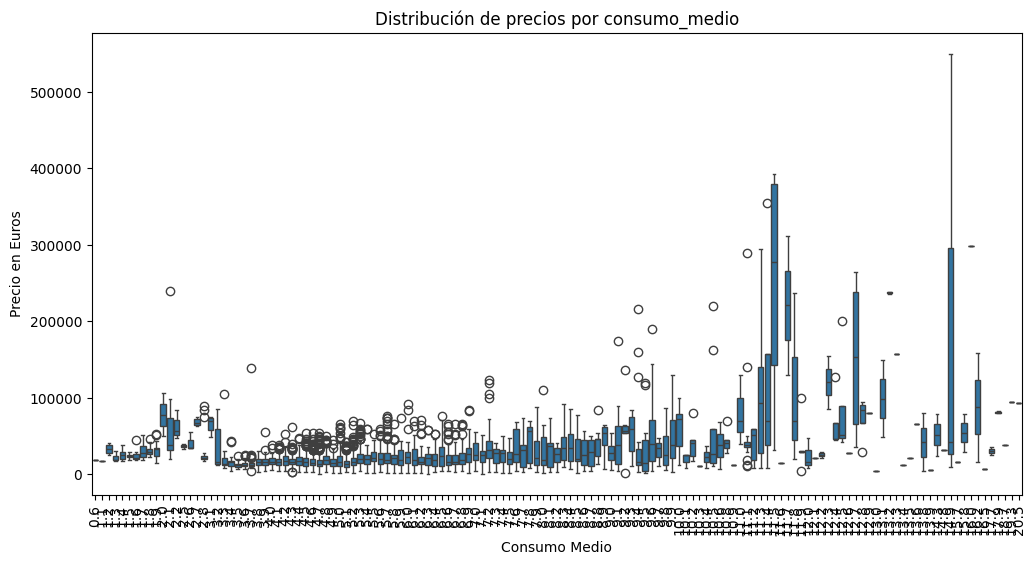

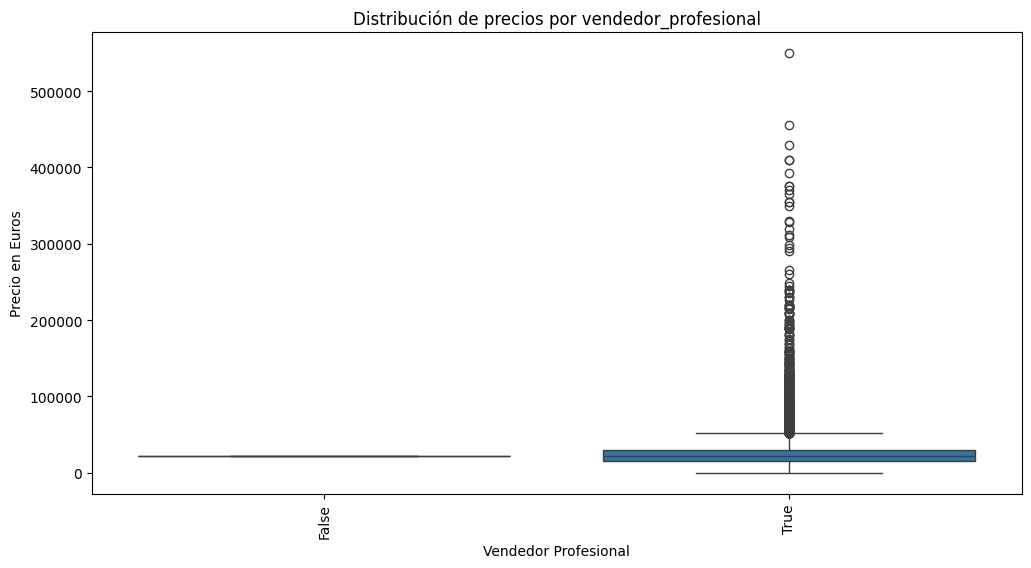

In [13]:
for columna in columnas_categoricas:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x= columna, y='precio', data=df)
    plt.xlabel(f"{formatear_texto(columna)}") 
    plt.ylabel("Precio en Euros")
    plt.xticks(rotation=90)
    plt.title(f'Distribución de precios por {columna}')
    plt.show()

In [14]:
columnas_numericas = []

for columna in df.columns:
    if (df[columna].dtype in [np.float64, np.int64]) and (columna != 'referencia'):
        columnas_numericas.append(columna)

columnas_numericas


['kilometraje',
 'garantia',
 'plazas',
 'potencia',
 'puertas',
 'precio',
 'consumo_medio',
 'mes_matricula',
 'anio_matricula']

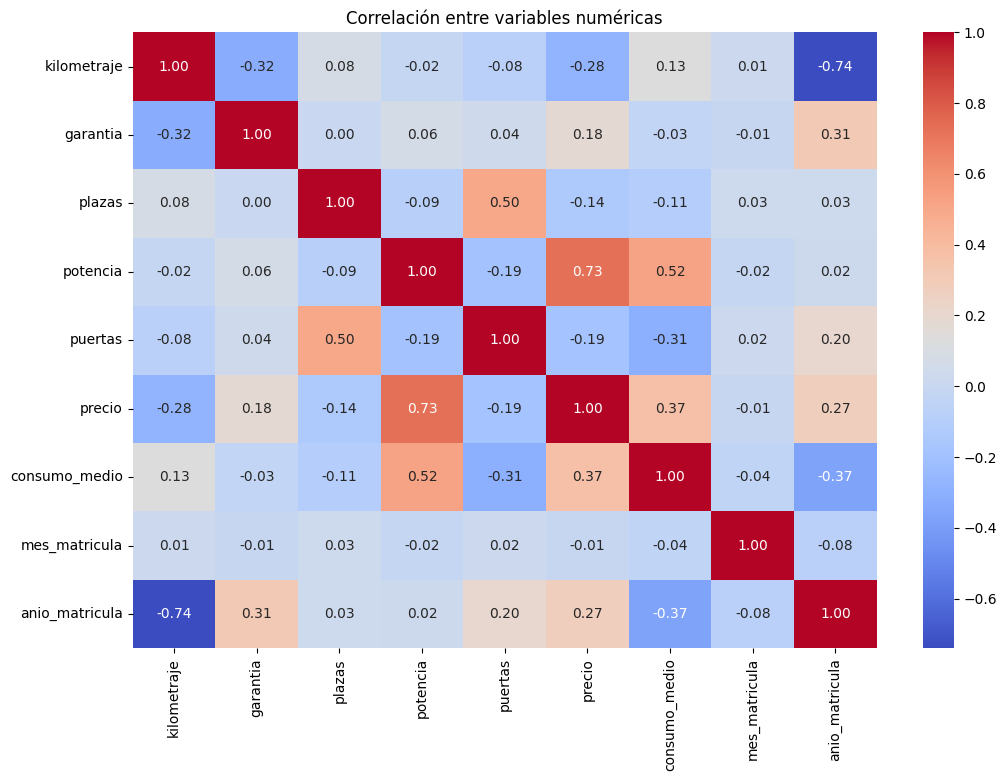

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = df[columnas_numericas].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas')
plt.show()

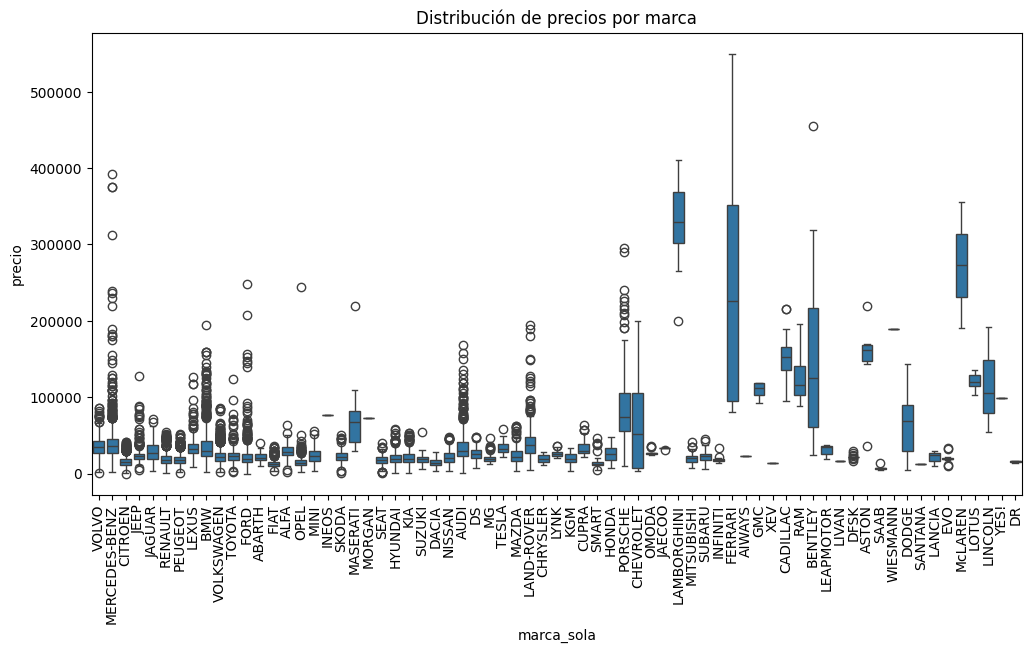

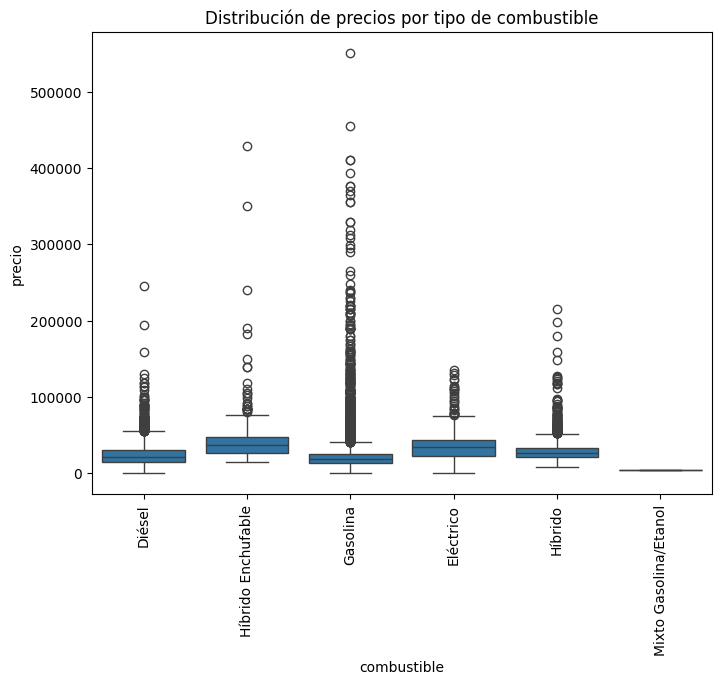

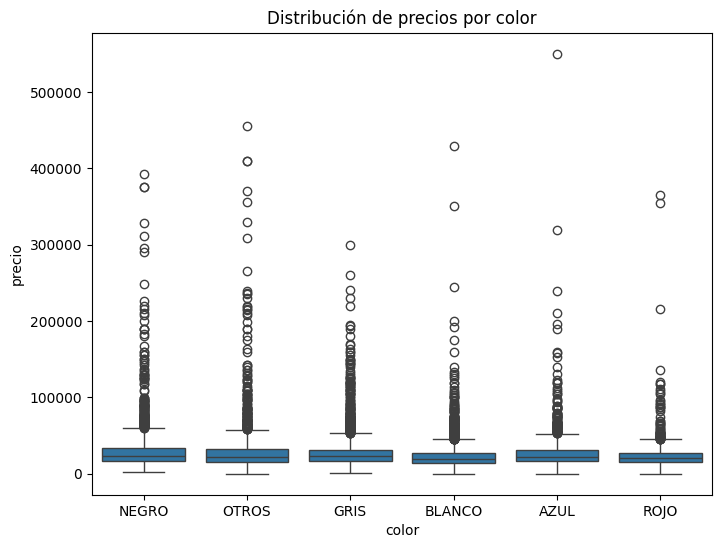

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='marca_sola', y='precio', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de precios por marca')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='combustible', y='precio', data=df)
plt.title('Distribución de precios por tipo de combustible')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='precio', data=df)
plt.title('Distribución de precios por color')
plt.show()

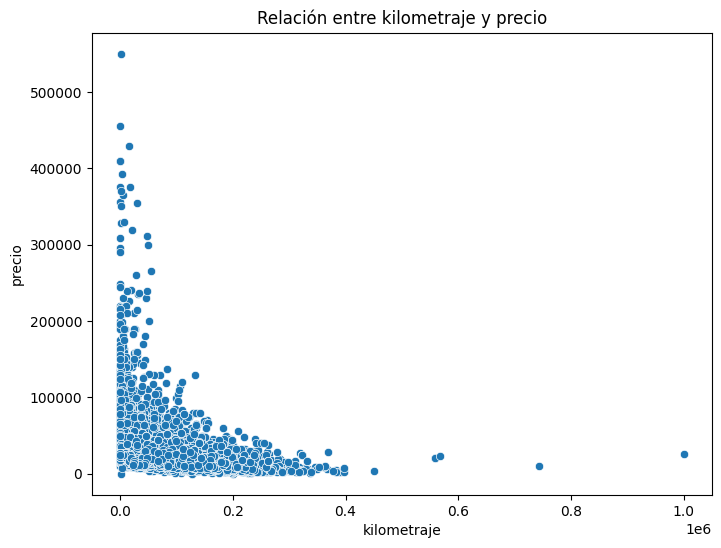

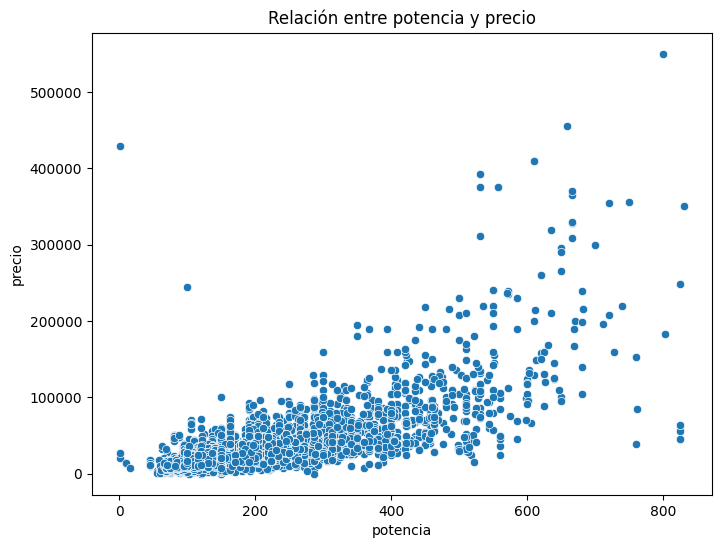

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='kilometraje', y='precio', data=df)
plt.title('Relación entre kilometraje y precio')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='potencia', y='precio', data=df)
plt.title('Relación entre potencia y precio')
plt.show()

## Relación precio y antigüedad de coches

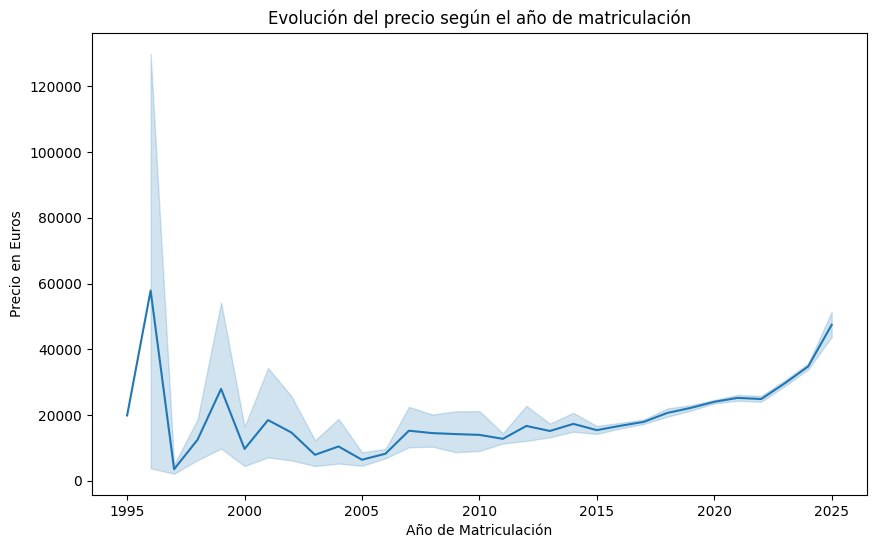

In [18]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='anio_matricula', y='precio', data=df)
plt.title('Evolución del precio según el año de matriculación')
plt.xlabel("Año de Matriculación") 
plt.ylabel("Precio en Euros")
plt.show()

In [19]:
concesionarios = pd.read_csv("../data/concesionarios_limpio.csv")

In [20]:
concesionarios.columns 

Index(['nombre', 'calle', 'municipio', 'provincia', 'codigo_postal'], dtype='object')

In [21]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'url', 'ruta_imagen', 'marca_sola',
       'mes_matricula', 'anio_matricula', 'nombre_vendedor',
       'peninsula_y_baleares', 'comunidad'],
      dtype='object')

In [22]:
concesionarios["municipio"] = concesionarios["municipio"].str.replace("Municipio: ", "", regex=True)

concesionarios['nombre'] = concesionarios['nombre'].apply(lambda x: x.upper())
concesionarios = concesionarios.rename(columns={'nombre': 'nombre_vendedor'})
concesionarios = concesionarios[["nombre_vendedor", "municipio", "codigo_postal"]]

concesionarios

nombre_vendedor             municipio  codigo_postal
0     --AUTOMOVILES VIA NORTE --                 Naron        15570.0
1                    *ACS MOTOR*               Iniesta        16235.0
2                   + QUE COCHES  Talavera de la reina        45600.0
3                       11ELEVEN                Madrid        28294.0
4                13 PREMIUM CARS                Aldaia        46960.0
...                          ...                   ...            ...
4095                     ZENCARS                Madrid        28049.0
4096  ZENTRO MACHINE- CASE, S.A.                   NaN            0.0
4097            ZOANSA TAILERRAK       Lesaka, navarra        31770.0
4098              ZOE AUTOMOCION               Sonseca        45100.0
4099              ZYLAUTOS MOTOR              Valencia        46017.0

[4100 rows x 3 columns]

In [23]:
df_unido = pd.merge(df, concesionarios, on='nombre_vendedor', how='left')

In [24]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo_titulo         17536 non-null  object 
 1   provincia             17536 non-null  object 
 2   kilometraje           17536 non-null  int64  
 3   combustible           17403 non-null  object 
 4   distintivo_ambiental  16106 non-null  object 
 5   garantia              17536 non-null  float64
 6   cambio_automatico     17536 non-null  bool   
 7   carroceria            17520 non-null  object 
 8   plazas                12018 non-null  float64
 9   potencia              17446 non-null  float64
 10  puertas               17536 non-null  int64  
 11  color                 17536 non-null  object 
 12  precio                17531 non-null  float64
 13  vendedor_profesional  17536 non-null  bool   
 14  consumo_medio         7053 non-null   float64
 15  certificado        

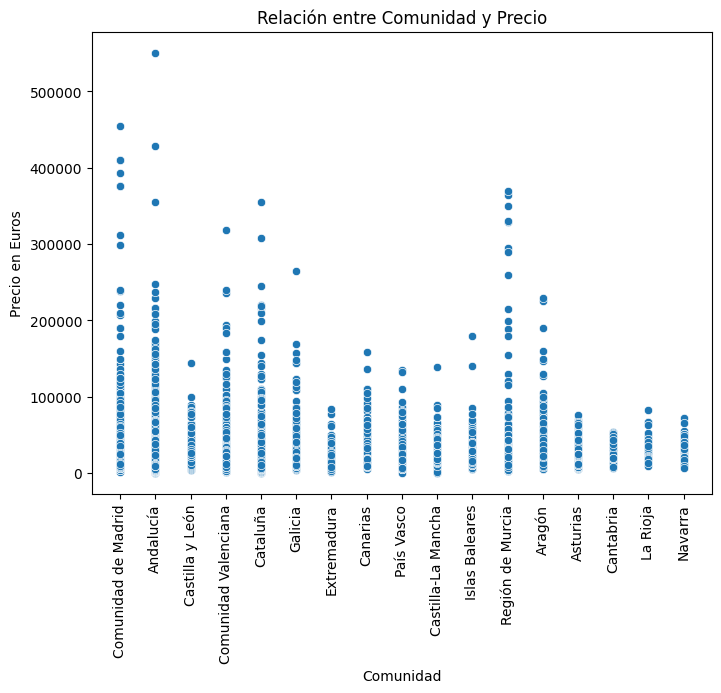

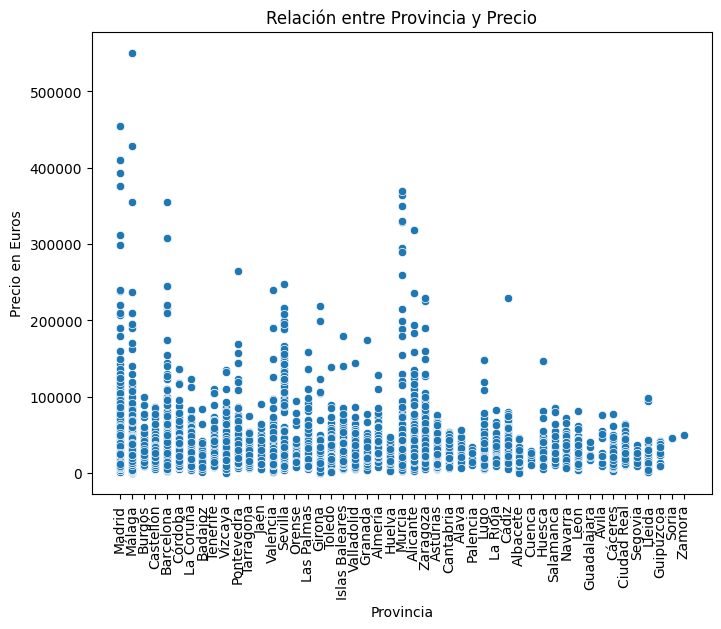

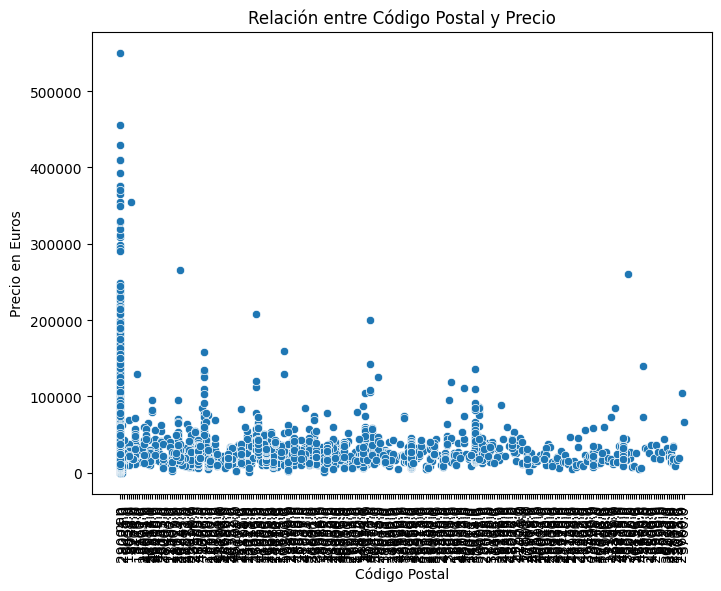

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='comunidad', y='precio', data=df)
plt.title('Relación entre Comunidad y Precio')
plt.xticks(rotation=90)
plt.xlabel("Comunidad") 
plt.ylabel("Precio en Euros")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='provincia', y='precio', data=df)
plt.title('Relación entre Provincia y Precio')
plt.xlabel("Provincia") 
plt.ylabel("Precio en Euros")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_unido['codigo_postal'].astype(str), y='precio', data=df_unido)
plt.title('Relación entre Código Postal y Precio')
plt.xlabel("Código Postal") 
plt.ylabel("Precio en Euros")
plt.xticks(rotation=90)
plt.show()

In [26]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'url', 'ruta_imagen', 'marca_sola',
       'mes_matricula', 'anio_matricula', 'nombre_vendedor',
       'peninsula_y_baleares', 'comunidad'],
      dtype='object')

## Definir dos gráficos 


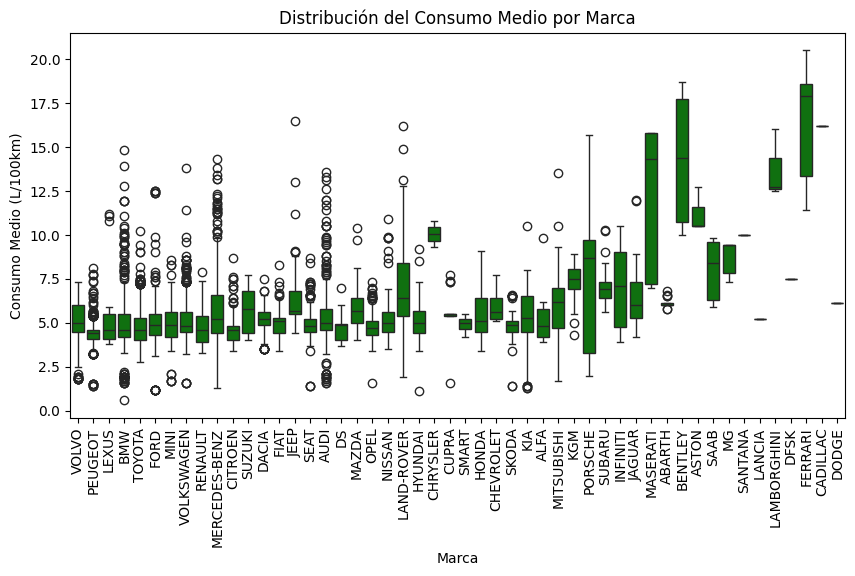

In [27]:
#Relación de consumo medio por marca
plt.figure(figsize=(10,5))

df_consumo = df[df['consumo_medio']>0] 

sns.boxplot(x='marca_sola', y='consumo_medio', data=df_consumo, color= 'green')

plt.xlabel('Marca')
plt.ylabel('Consumo Medio (L/100km)')
plt.title('Distribución del Consumo Medio por Marca')
plt.xticks(rotation=90)

plt.show()


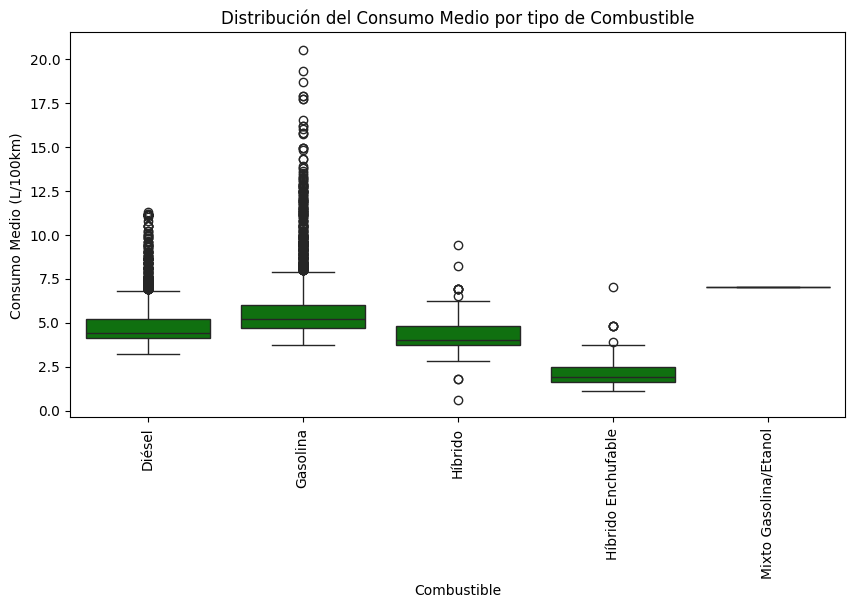

In [28]:
#Relación de consumo medio por tipo de combustible
plt.figure(figsize=(10,5))

sns.boxplot(x='combustible', y='consumo_medio', data=df_consumo, color= 'green')

plt.xlabel('Combustible')
plt.ylabel('Consumo Medio (L/100km)')
plt.title('Distribución del Consumo Medio por tipo de Combustible')
plt.xticks(rotation=90)

plt.show()

## Gráfico de outliers


La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).


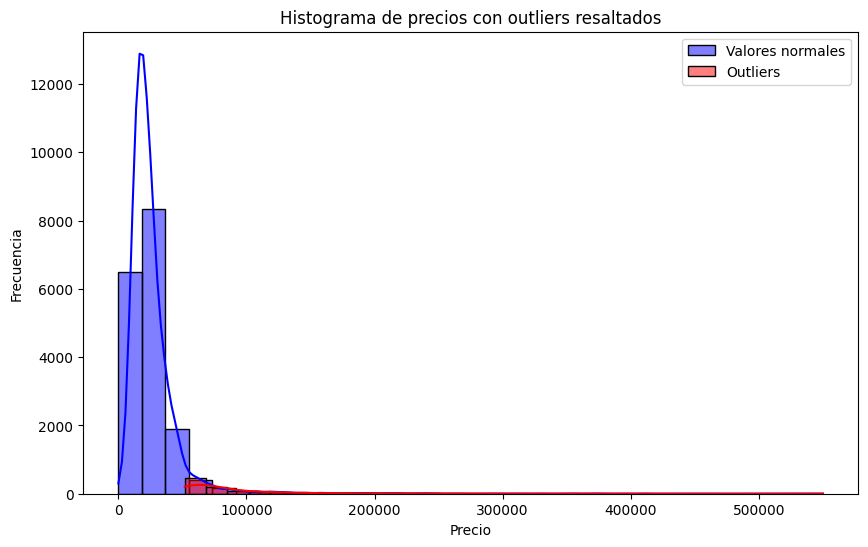

1         69999.0
29        71990.0
30        99890.0
35        76900.0
43       220000.0
           ...   
17421     52890.0
17423     52490.0
17425     59900.0
17440     59990.0
17444     52490.0
Name: precio, Length: 946, dtype: float64

In [29]:
from scipy.stats import normaltest, zscore

columna = "precio"

stat, p_value = normaltest(df[columna].dropna())  

# Si p > 0.05 tiene distribucion normal y usamos Z-Score, si no usamos Tukey
if p_value > 0.05:
    print("La distribución de precios es normal (p > 0.05), usaremos Z-Score.")
    z = 3  
    z_scores = zscore(df[columna].dropna())
    outliers = df[np.abs(z_scores) > z]
else:
    print("La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).")
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    ric = q3 - q1
    lim_izq= q1 - 1.5 * ric
    lim_der = q3 + 1.5 * ric
    outliers = df[(df[columna] < lim_izq) | (df[columna] > lim_der)]

plt.figure(figsize=(10, 6))
sns.histplot(df[columna], bins=30, kde=True, color="blue", label="Valores normales")
sns.histplot(outliers[columna], bins=30, kde=True, color="red", label="Outliers")

plt.title("Histograma de precios con outliers resaltados")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

outliers[columna]

## MAPA COROPLETICO

In [30]:
df_agrupado1 = df.groupby("comunidad").agg(
    cantidad_coches=("precio", "count"),
    precio_medio=("precio", "mean")
).reset_index()


In [31]:
df_agrupado1

comunidad  cantidad_coches  precio_medio
0              Andalucía             2917  27754.890298
1                 Aragón              303  34687.633663
2               Asturias              480  28565.102083
3               Canarias              678  28759.668142
4              Cantabria              101  23115.980198
5        Castilla y León              663  26683.467572
6     Castilla-La Mancha              313  27808.929712
7               Cataluña             2133  23311.157525
8   Comunidad Valenciana             1513  29372.988764
9    Comunidad de Madrid             6374  23605.360213
10           Extremadura              231  22109.991342
11               Galicia              683  29828.238653
12        Islas Baleares              308  23331.448052
13              La Rioja               68  28471.470588
14               Navarra               33  31166.818182
15            País Vasco              478  27712.054393
16      Región de Murcia              237  39997.983122

In [32]:
coordenadas_dict = {
    'Andalucía': [-6.933198279, 38.20515158308281],
    'Cataluña': [1.0, 41.6],
    'Madrid': [-3.7038, 40.4168],
    'Galicia': [-8.5, 42.0],
    'Castilla y León': [-4.7, 41.6],
    'Castilla-La Mancha': [-3.5, 39.9],
    'Comunidad Valenciana': [-0.6, 39.5],
    'País Vasco': [-2.0, 43.0],
    'Aragón': [-1.0, 41.5],
    'Extremadura': [-6.0, 39.5],
    'Canarias': [-13.5, 28.3],
    'Cantabria': [-4.0, 43.3],
    'Región de Murcia': [-1.0, 38.0],
    'Baleares': [2.5, 39.5],
    'Asturias': [-6.933198279, 38.20515158308281],
    'La Rioja': [-2.0, 42.0],
    'Navarra': [-1.6, 42.7],
    'Castilla y León': [-4.7, 41.6],
    'Comunidad de Madrid': [-3.7038, 40.4168],
    'Ceuta': [-5.3, 35.9],
    'Melilla': [-2.9, 35.3]
}

df_agrupado1['coordenadas_comunidad'] = df_agrupado1['comunidad'].map(coordenadas_dict)


df_agrupado1

comunidad  cantidad_coches  precio_medio  \
0              Andalucía             2917  27754.890298   
1                 Aragón              303  34687.633663   
2               Asturias              480  28565.102083   
3               Canarias              678  28759.668142   
4              Cantabria              101  23115.980198   
5        Castilla y León              663  26683.467572   
6     Castilla-La Mancha              313  27808.929712   
7               Cataluña             2133  23311.157525   
8   Comunidad Valenciana             1513  29372.988764   
9    Comunidad de Madrid             6374  23605.360213   
10           Extremadura              231  22109.991342   
11               Galicia              683  29828.238653   
12        Islas Baleares              308  23331.448052   
13              La Rioja               68  28471.470588   
14               Navarra               33  31166.818182   
15            País Vasco              478  27712.054393   
16      Región de Murcia              237  39997.983122   

                coordenadas_comunidad  
0   [-6.933198279, 38.20515158308281]  
1                        [-1.0, 41.5]  
2   [-6.933198279, 38.20515158308281]  
3                       [-13.5, 28.3]  
4                        [-4.0, 43.3]  
5                        [-4.7, 41.6]  
6                        [-3.5, 39.9]  
7                         [1.0, 41.6]  
8                        [-0.6, 39.5]  
9                  [-3.7038, 40.4168]  
10                       [-6.0, 39.5]  
11                       [-8.5, 42.0]  
12                                NaN  
13                       [-2.0, 42.0]  
14                       [-1.6, 42.7]  
15                       [-2.0, 43.0]  
16                       [-1.0, 38.0]

In [33]:
df_agrupado1['comunidad'] = df_agrupado1['comunidad'].replace({
    "Comunidad Valenciana": "Comunitat Valenciana",
    "Navarra": "Comunidad Foral de Navarra",
    "Asturias":"Principado de Asturias",
})
df_agrupado1

comunidad  cantidad_coches  precio_medio  \
0                    Andalucía             2917  27754.890298   
1                       Aragón              303  34687.633663   
2       Principado de Asturias              480  28565.102083   
3                     Canarias              678  28759.668142   
4                    Cantabria              101  23115.980198   
5              Castilla y León              663  26683.467572   
6           Castilla-La Mancha              313  27808.929712   
7                     Cataluña             2133  23311.157525   
8         Comunitat Valenciana             1513  29372.988764   
9          Comunidad de Madrid             6374  23605.360213   
10                 Extremadura              231  22109.991342   
11                     Galicia              683  29828.238653   
12              Islas Baleares              308  23331.448052   
13                    La Rioja               68  28471.470588   
14  Comunidad Foral de Navarra               33  31166.818182   
15                  País Vasco              478  27712.054393   
16            Región de Murcia              237  39997.983122   

                coordenadas_comunidad  
0   [-6.933198279, 38.20515158308281]  
1                        [-1.0, 41.5]  
2   [-6.933198279, 38.20515158308281]  
3                       [-13.5, 28.3]  
4                        [-4.0, 43.3]  
5                        [-4.7, 41.6]  
6                        [-3.5, 39.9]  
7                         [1.0, 41.6]  
8                        [-0.6, 39.5]  
9                  [-3.7038, 40.4168]  
10                       [-6.0, 39.5]  
11                       [-8.5, 42.0]  
12                                NaN  
13                       [-2.0, 42.0]  
14                       [-1.6, 42.7]  
15                       [-2.0, 43.0]  
16                       [-1.0, 38.0]

In [34]:
df_agrupado1['precio_medio'] = df_agrupado1['precio_medio'].apply(lambda x: round(x,2))
df_agrupado1

comunidad  cantidad_coches  precio_medio  \
0                    Andalucía             2917      27754.89   
1                       Aragón              303      34687.63   
2       Principado de Asturias              480      28565.10   
3                     Canarias              678      28759.67   
4                    Cantabria              101      23115.98   
5              Castilla y León              663      26683.47   
6           Castilla-La Mancha              313      27808.93   
7                     Cataluña             2133      23311.16   
8         Comunitat Valenciana             1513      29372.99   
9          Comunidad de Madrid             6374      23605.36   
10                 Extremadura              231      22109.99   
11                     Galicia              683      29828.24   
12              Islas Baleares              308      23331.45   
13                    La Rioja               68      28471.47   
14  Comunidad Foral de Navarra               33      31166.82   
15                  País Vasco              478      27712.05   
16            Región de Murcia              237      39997.98   

                coordenadas_comunidad  
0   [-6.933198279, 38.20515158308281]  
1                        [-1.0, 41.5]  
2   [-6.933198279, 38.20515158308281]  
3                       [-13.5, 28.3]  
4                        [-4.0, 43.3]  
5                        [-4.7, 41.6]  
6                        [-3.5, 39.9]  
7                         [1.0, 41.6]  
8                        [-0.6, 39.5]  
9                  [-3.7038, 40.4168]  
10                       [-6.0, 39.5]  
11                       [-8.5, 42.0]  
12                                NaN  
13                       [-2.0, 42.0]  
14                       [-1.6, 42.7]  
15                       [-2.0, 43.0]  
16                       [-1.0, 38.0]

In [35]:
import json
import plotly.express as px
import pandas as pd
import requests

geojson_url_comunidades = "https://raw.githubusercontent.com/Bross-IT/PFB_coches/refs/heads/main/src/geojson/comunidades_espana.geojson"

response = requests.get(geojson_url_comunidades)
geojson_data1 = response.json()

comunidades_geojson = pd.DataFrame([{
    'comunidad': feature['properties']['acom_name'],  
    'geometry': feature['geometry'] 
} for feature in geojson_data1['features']])

df_comunidades_coches = comunidades_geojson.merge(df_agrupado1[['comunidad', 'cantidad_coches','precio_medio']], on='comunidad', how='left')

df_comunidades_coches['cantidad_coches'] = df_comunidades_coches['cantidad_coches'].fillna(0).astype(int)
df_comunidades_coches['precio_medio'] = df_comunidades_coches['precio_medio'].fillna(0).astype(int)

fig = px.choropleth_mapbox(
    df_comunidades_coches,
    geojson=geojson_data1,               
    locations='comunidad',                  
    featureidkey="properties.acom_name",    
    color='cantidad_coches',                
    color_continuous_scale="reds",          
    mapbox_style="carto-positron",          
    center={"lat": 36.2, "lon": -7.3},  
    zoom=4,                         
    title="Densidad de Coches en Venta y Precio Medio por Comunidad Autónoma",
    hover_data={'comunidad': False, 'cantidad_coches': False,'precio_medio': False},  
    custom_data=['comunidad', 'cantidad_coches', 'precio_medio'],  
)

fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")  

fig.update_traces(
    hovertemplate="<b>Comunidad</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio medio de Coches en la Comunidad</b>: €%{customdata[2]}"
)
fig.show()

html_file_path = "../img/mapa_comunidades.html"
fig.write_html(html_file_path, full_html=True)


C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_13296\1804921474.py:21: DeprecationWarning: *choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.choropleth_mapbox(


In [36]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'url', 'ruta_imagen', 'marca_sola',
       'mes_matricula', 'anio_matricula', 'nombre_vendedor',
       'peninsula_y_baleares', 'comunidad'],
      dtype='object')

In [37]:
df_agrupado2 = df.groupby('provincia').agg(
    cantidad_coches=('provincia', 'count'),  
    precio_medio=('precio', 'mean')         
).reset_index()
df_agrupado2['precio_medio'] = df_agrupado2['precio_medio'].apply(lambda x: round(x,2))
df_agrupado2.head()

provincia  cantidad_coches  precio_medio
0  Albacete               51      21983.88
1  Alicante              495      35470.33
2   Almería              158      34094.56
3  Asturias              480      28565.10
4   Badajoz              121      20988.80

In [38]:
coordenadas_provincias = {
    "Álava": (42.8467, -2.6727),
    "Albacete": (38.9943, -1.8585),
    "Alicante": (38.3452, -0.4810),
    "Almería": (36.8402, -2.4679),
    "Asturias": (43.3614, -5.8593),
    "Ávila": (40.6566, -4.7003),
    "Badajoz": (38.8794, -6.9707),
    "Barcelona": (41.3851, 2.1734),
    "Burgos": (42.3439, -3.6969),
    "Cáceres": (39.4763, -6.3724),
    "Cádiz": (36.5298, -6.2923),
    "Cantabria": (43.1828, -3.9878),
    "Castellón": (39.9864, -0.0513),
    "Ciudad Real": (38.9863, -3.9291),
    "Córdoba": (37.8882, -4.7794),
    "Cuenca": (40.0718, -2.1316),
    "Girona": (41.9794, 2.8214),
    "Granada": (37.1773, -3.5986),
    "Guadalajara": (40.6332, -3.1676),
    "Guipúzcoa": (43.3128, -1.9746),
    "Huelva": (37.2614, -6.9447),
    "Huesca": (42.1362, -0.4087),
    "Illes Balears": (39.6953, 3.0176),
    "Jaén": (37.7796, -3.7849),
    "La Coruña": (43.3623, -8.4115),
    "La Rioja": (42.2871, -2.5396),
    "Las Palmas": (28.1235, -15.4363),
    "León": (42.5987, -5.5671),
    "Lleida": (41.6176, 0.6200),
    "Lugo": (43.0122, -7.5589),
    "Madrid": (40.4168, -3.7038),
    "Málaga": (36.7213, -4.4213),
    "Murcia": (37.9922, -1.1307),
    "Navarra": (42.6954, -1.6761),
    "Orense": (42.3366, -7.8631),
    "Palencia": (42.0097, -4.5282),
    "Pontevedra": (42.4304, -8.6441),
    "Salamanca": (40.9701, -5.6635),
    "Santa Cruz de Tenerife": (28.4636, -16.2518),
    "Segovia": (40.9429, -4.1088),
    "Sevilla": (37.3886, -5.9823),
    "Soria": (41.7636, -2.4646),
    "Tarragona": (41.1189, 1.2445),
    "Teruel": (40.3456, -1.1064),
    "Toledo": (39.8628, -4.0273),
    "Valencia": (39.4699, -0.3763),
    "Valladolid": (41.6523, -4.7245),
    "Vizcaya": (43.2630, -2.9340),
    "Zamora": (41.5033, -5.7434),
    "Zaragoza": (41.6488, -0.8891),
    "Ceuta": (35.8894, -5.3213),
    "Melilla": (35.2923, -2.9381)
}
df_agrupado2['coordenadas_provincias'] = df_agrupado2['provincia'].map(coordenadas_provincias)
df_agrupado2.head()

provincia  cantidad_coches  precio_medio coordenadas_provincias
0  Albacete               51      21983.88     (38.9943, -1.8585)
1  Alicante              495      35470.33      (38.3452, -0.481)
2   Almería              158      34094.56     (36.8402, -2.4679)
3  Asturias              480      28565.10     (43.3614, -5.8593)
4   Badajoz              121      20988.80     (38.8794, -6.9707)

In [39]:
geojson_url_provincias = '../src/geojson/provincias_espana.geojson'

with open(geojson_url_provincias, encoding="utf-8") as f:
    geojson_data2 = json.load(f)

In [40]:
df_provincias = set(df_agrupado2['provincia'].unique())
geojson_provincias = {feature['properties']['name'] for feature in geojson_data2['features']}

In [41]:
provincias_faltantes_geojson = df_provincias - geojson_provincias
print("Provincias en DataFrame pero NO en GeoJSON:", provincias_faltantes_geojson)

provincias_faltantes_df = geojson_provincias - df_provincias
print("Provincias en GeoJSON pero NO en DataFrame:", provincias_faltantes_df)

Provincias en DataFrame pero NO en GeoJSON: {'Vizcaya', 'Álava', 'Islas Baleares', 'Orense', 'Tenerife', 'Guipúzcoa', 'Alicante', 'Valencia', 'La Coruña', 'Castellón'}
Provincias en GeoJSON pero NO en DataFrame: {'València/Valencia', 'Santa Cruz De Tenerife', 'Melilla', 'Alacant/Alicante', 'Araba/Álava', 'Castelló/Castellón', 'A Coruña', 'Gipuzkoa/Guipúzcoa', 'Ourense', 'Bizkaia/Vizcaya', 'Ceuta', 'Illes Balears', 'Teruel'}


In [42]:
correccion_nombres_df = {
    "Alicante": "Alacant/Alicante",
    "Vizcaya": "Bizkaia/Vizcaya",
    "La Coruña": "A Coruña",
    "Castellón": "Castelló/Castellón",
    "Valencia": "València/Valencia",
    "Álava": "Araba/Álava",
    "Guipúzcoa": "Gipuzkoa/Guipúzcoa",
    "Orense": "Ourense",
    "Baleares": "Illes Balears",
    "Santa Cruz de Tenerife": "Santa Cruz De Tenerife"
}
df_agrupado2['provincia'] = df_agrupado2['provincia'].replace(correccion_nombres_df)
df_agrupado2.head()

provincia  cantidad_coches  precio_medio coordenadas_provincias
0          Albacete               51      21983.88     (38.9943, -1.8585)
1  Alacant/Alicante              495      35470.33      (38.3452, -0.481)
2           Almería              158      34094.56     (36.8402, -2.4679)
3          Asturias              480      28565.10     (43.3614, -5.8593)
4           Badajoz              121      20988.80     (38.8794, -6.9707)

In [43]:
geojson_url_provincias = 'https://raw.githubusercontent.com/Bross-IT/PFB_coches/refs/heads/main/src/geojson/provincias_espana.geojson'

provincias_geojson = pd.DataFrame([{
    'provincia': feature['properties']['name'],  
    'geometry': feature['geometry']
} for feature in geojson_data2['features']])

df_provincias_coches_precio = provincias_geojson.merge(df_agrupado2, on='provincia', how='left')

df_provincias_coches_precio['cantidad_coches'] = df_provincias_coches_precio['cantidad_coches'].fillna(0).astype(int)
df_provincias_coches_precio['precio_medio'] = df_provincias_coches_precio['precio_medio'].fillna(0)

fig = px.choropleth_mapbox(
    df_provincias_coches_precio,
    geojson=geojson_url_provincias,
    locations='provincia',                
    featureidkey="properties.name",  
    color='cantidad_coches',              
    color_continuous_scale="reds",        
    mapbox_style="carto-positron",        
    center={"lat": 40.416775, "lon": -3.703790},  
    zoom=4,                             
    title="Densidad de Coches en Venta y Precio Medio por Provincia",
    hover_data={'provincia': False, 'precio_medio': False},  
    custom_data=['provincia', 'cantidad_coches', 'precio_medio'],  
)

fig.update_traces(
    hovertemplate="<b>Provincia</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio Medio</b>: %{customdata[2]:,.2f}€"
)
fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")
fig.show()

html_file_path = "../img/mapa_provincias.html"
fig.write_html(html_file_path, full_html=True)

C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_13296\2523292532.py:13: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [44]:
concesionarios = pd.read_csv("../data/concesionarios_limpio.csv")

In [45]:
df['nombre_vendedor']

0        INDIVIDUAL AUTO SL\n
1              AUTOS DANIEL\n
2          MOTOR ARANDA, VO\n
3          COMAUTO SPORT SA\n
4                  AUTOFESA\n
                 ...         
17513               RUTA 66\n
17514         AUTOS MOLIERE\n
17515        CLICARS MADRID\n
17516         AUTOS MOLIERE\n
17517        CLICARS MADRID\n
Name: nombre_vendedor, Length: 17518, dtype: object

In [46]:
concesionarios[concesionarios['nombre'] == 'MARTINSA MOTOR']

nombre                                     calle    municipio  \
2635  MARTINSA MOTOR  C/ Moscatel, 18 - P.i. Arroyo De La Miel  Benalmádema   

     provincia  codigo_postal  
2635    Málaga        29631.0

In [47]:
concesionarios["municipio"] = concesionarios["municipio"].str.replace("Municipio: ", "", regex=True)
concesionarios = concesionarios.rename(columns={'nombre': 'nombre_vendedor'})
concesionarios['nombre_vendedor'] = concesionarios['nombre_vendedor'].apply(lambda x: x.upper())
concesionarios = concesionarios[["nombre_vendedor", "municipio", "codigo_postal"]]
concesionarios

nombre_vendedor             municipio  codigo_postal
0     --AUTOMOVILES VIA NORTE --                 Naron        15570.0
1                    *ACS MOTOR*               Iniesta        16235.0
2                   + QUE COCHES  Talavera de la reina        45600.0
3                       11ELEVEN                Madrid        28294.0
4                13 PREMIUM CARS                Aldaia        46960.0
...                          ...                   ...            ...
4095                     ZENCARS                Madrid        28049.0
4096  ZENTRO MACHINE- CASE, S.A.                   NaN            0.0
4097            ZOANSA TAILERRAK       Lesaka, navarra        31770.0
4098              ZOE AUTOMOCION               Sonseca        45100.0
4099              ZYLAUTOS MOTOR              Valencia        46017.0

[4100 rows x 3 columns]

In [48]:
lista_concesionarios_si = []
lista_concesionarios_no = []
for i in concesionarios['nombre_vendedor']:
    if i in df['nombre_vendedor'].values:
        lista_concesionarios_si.append(i)
    else:
        lista_concesionarios_no.append(i)

print(f'Lista de concesionarios que se encuentran en el df original: {len(lista_concesionarios_si)}')
print(lista_concesionarios_si)
print(f'Lista de concesionarios que NO se encuentran en el df original: {len(lista_concesionarios_no)}')
print(lista_concesionarios_no)



Lista de concesionarios que se encuentran en el df original: 344
['ACEROM ASESORES', 'ALBA OCASIÓN', 'ALGAMAUTO', 'ALHAMBRA AUTOMOVILES, S.A.', 'ANGALTRUCK', 'AQUITUCOCHE', 'ARAMÓVIL', 'ARGÜELLES CARS S.L', 'ASTER AUTOS', 'AUDI ALZAGA MOTOR', 'AUDI VILAMÒBIL', 'AUNORSA', 'AUPASA OCASION PALENCIA', 'AUTERSA CASTELLÓN', 'AUTO BOSS', 'AUTO ELAND BARCELONA', 'AUTO GONSE', 'AUTO OJA, S.A.', 'AUTO SELECT EDITION', 'AUTO SPRINT', 'AUTOCAM', 'AUTOCASION CABAS', 'AUTOCASION SANTA POLA', 'AUTOCENTRO IGARA', 'AUTOCYL OCASIÓN', 'AUTOFESA', 'AUTOGRADO', 'AUTOHERO BARCELONA', 'AUTOHERO CENTER MADRID', 'AUTOKIA', 'AUTOKOLECCIÓ', 'AUTOKRATOR', 'AUTOLEVEL', 'AUTOMEDITERRANEO', 'AUTOMOCION CUEVA', 'AUTOMOVILES ALVARO', 'AUTOMOVILES ANDRES ZARAGOZA', 'AUTOMOVILES BRETONES', 'AUTOMOVILES CEGARRA', 'AUTOMOVILES CERVERA MADRID', 'AUTOMOVILES EL CAMPON', 'AUTOMOVILES ENMA', 'AUTOMOVILES GABILONDO', 'AUTOMÓVILES LOUZAO', 'AUTOMOVILES LOUZAO VIGO', 'AUTOMOVILES MARTIN', 'AUTOMOVILES PLAYCAR, S.L.U', 'AUTOMÓVIL

In [49]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo_titulo         17536 non-null  object 
 1   provincia             17536 non-null  object 
 2   kilometraje           17536 non-null  int64  
 3   combustible           17403 non-null  object 
 4   distintivo_ambiental  16106 non-null  object 
 5   garantia              17536 non-null  float64
 6   cambio_automatico     17536 non-null  bool   
 7   carroceria            17520 non-null  object 
 8   plazas                12018 non-null  float64
 9   potencia              17446 non-null  float64
 10  puertas               17536 non-null  int64  
 11  color                 17536 non-null  object 
 12  precio                17531 non-null  float64
 13  vendedor_profesional  17536 non-null  bool   
 14  consumo_medio         7053 non-null   float64
 15  certificado        

In [50]:
geojson_url_municipios = '../src/geojson/municipios_espana.geojson'

with open(geojson_url_municipios, encoding='utf-8') as f:
    geojson_data = json.load(f)


In [51]:
print(geojson_data['features'][0]['properties'])

{'OBJECTID': 1, 'INSPIREID': 'ES.IGN.SIGLIM34081616266', 'NATCODE': '34081616266', 'NAMEUNIT': 'Villarejo-Periesteban', 'CODNUT1': 'ES4', 'CODNUT2': 'ES42', 'CODNUT3': 'ES423', 'CODIGOINE': '16266'}


In [52]:
municipios_geojson = pd.DataFrame([{
    'municipio': feature['properties']['NAMEUNIT'],  
    'provincia': feature['properties']['CODNUT2'],  
    'geometry': feature['geometry']
} for feature in geojson_data['features']])

municipios_geojson



municipio provincia  \
0       Villarejo-Periesteban      ES42   
1            Villares del Saz      ES42   
2                 Villarrubio      ES42   
3                    Villarta      ES42   
4        Villas de la Ventosa      ES42   
...                       ...       ...   
8200             Vallehermoso      ES70   
8201  La Victoria de Acentejo      ES70   
8202       Vilaflor de Chasna      ES70   
8203            Villa de Mazo      ES70   
8204    El Pinar de El Hierro      ES70   

                                               geometry  
0     {'type': 'Polygon', 'coordinates': [[[-2.47791...  
1     {'type': 'Polygon', 'coordinates': [[[-2.58668...  
2     {'type': 'Polygon', 'coordinates': [[[-2.96423...  
3     {'type': 'Polygon', 'coordinates': [[[-1.68040...  
4     {'type': 'Polygon', 'coordinates': [[[-2.49911...  
...                                                 ...  
8200  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  
8201  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  
8202  {'type': 'Polygon', 'coordinates': [[[-16.6846...  
8203  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  
8204  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  

[8205 rows x 3 columns]

In [53]:
df_unido = pd.merge(df, concesionarios, on='nombre_vendedor', how='left')

In [54]:
df_unido

modelo_titulo  provincia  \
0              XC40 D4 R-Design Premium Edition AWD Aut.     Madrid   
1          Clase GLC Todoterreno Automático de 5 Puertas     Málaga   
2                       C5 X 1.6 Puretech Shine EAT8 180     Burgos   
3                               Avenger 1.2 Altitude 100  Castellón   
4      XF 3.0 V6 238cv Luxury 4p Auto #LIBRO, NAVY, C...     Madrid   
...                                                  ...        ...   
17531                             Forfour Electric Drive     Madrid   
17532                                  C-HR 125H Advance     Málaga   
17533                      500 1.0 Hybrid Dolcevita 52kW     Madrid   
17534                             C-HR 200H GR Sport AWD     Málaga   
17535                       Yaris Cross 120H Active Tech     Madrid   

       kilometraje         combustible distintivo_ambiental  garantia  \
0           115000              Diésel                    C      12.0   
1            15000  Híbrido Enchufable          0 EMISIONES      12.0   
2            36777            Gasolina                    C      16.0   
3            27955            Gasolina                    C      24.0   
4           240000              Diésel                    B      16.0   
...            ...                 ...                  ...       ...   
17531       114000           Eléctrico          0 EMISIONES      12.0   
17532        84214             Híbrido                  ECO      12.0   
17533        23675            Gasolina                  ECO      12.0   
17534        29990             Híbrido                  ECO      12.0   
17535            3             Híbrido                  ECO      12.0   

       cambio_automatico         carroceria  plazas  potencia  ...  \
0                   True       Todo Terreno     5.0     190.0  ...   
1                   True  4x4, SUV o pickup     5.0     330.0  ...   
2                   True            Berlina     5.0     180.0  ...   
3                  False       Todo Terreno     5.0     100.0  ...   
4                   True            Berlina     NaN     240.0  ...   
...                  ...                ...     ...       ...  ...   
17531               True            Berlina     4.0      82.0  ...   
17532               True       Todo Terreno     5.0     122.0  ...   
17533              False            Berlina     4.0      70.0  ...   
17534               True       Todo Terreno     5.0     196.0  ...   
17535               True       Todo Terreno     5.0     116.0  ...   

                                                     url  \
0      https://www.autocasion.com/coches-segunda-mano...   
1      https://www.autocasion.com/coches-segunda-mano...   
2      https://www.autocasion.com/coches-segunda-mano...   
3      https://www.autocasion.com/coches-segunda-mano...   
4      https://www.autocasion.com/coches-segunda-mano...   
...                                                  ...   
17531  https://www.autocasion.com/coches-segunda-mano...   
17532  https://www.autocasion.com/coches-segunda-mano...   
17533  https://www.autocasion.com/coches-segunda-mano...   
17534  https://www.autocasion.com/coches-segunda-mano...   
17535  https://www.autocasion.com/coches-km0/km-0/toy...   

                                             ruta_imagen     marca_sola  \
0      img/coches/a508e653e25158ab5839cd873091777bd18...          VOLVO   
1      img/coches/fa24e8fda1b35d2ea01613019844110fd22...  MERCEDES-BENZ   
2      img/coches/14540815-2-154775279670793297503e3....        CITROEN   
3      img/coches/14746062-0-62346019667783ff4caed74....           JEEP   
4      img/coches/15506907-1-355547808767c1995c5fef01...         JAGUAR   
...                                                  ...            ...   
17531  img/coches/15052247-0-3678136871675fd7a070c3b5...          SMART   
17532  img/coches/15308598-0-24028841926794b0712250f7...         TOYOTA   
17533  img/coches/15503872-0-107187950667c0cf7d3f3844...           FIAT   
1

In [55]:
df_agrupado3 = df_unido.groupby('municipio').agg(
    cantidad_coches=('municipio', 'count'),  
    precio_medio=('precio', 'mean'))         

df_agrupado3['precio_medio'] = df_agrupado3['precio_medio'].apply(lambda x: round(x, 2))
df_agrupado3.reset_index(inplace=True)

df_agrupado3.head()

municipio  cantidad_coches  precio_medio
0               29004                1      26190.00
1            A coruña               12      31058.33
2             Alaquas               12      39963.92
3            Albacete                3      28990.00
4  Alcala de guadaira                5      39020.00

In [56]:
dif_df = set(df_agrupado3['municipio']) - set(municipios_geojson['municipio'])

dif_geojson = set(municipios_geojson['municipio']) - set(df_agrupado3['municipio'])

print("Municipios en DataFrame pero NO en GeoJSON:", dif_df)
print("Municipios en GeoJSON pero NO en DataFrame:", dif_geojson)


Municipios en DataFrame pero NO en GeoJSON: {'Lliçà de vall', 'Sant adrià de besòs', 'El prat de llobregat', 'Malaga', 'Alcalá de henares', 'San boi de llobregat', 'San luis', 'Torralba de calatrava', 'Orense', 'Velilla de san antonio', 'Jerez de la frontera', 'Valencia', 'Granadilla de abona', 'Perillo oleiros', 'Concentaina', 'Mostoles', 'Xativa', 'Bigues i riells', 'Santa cruz de tenerife', 'Palma de mallorca', 'Benicarlo', 'Leganes', 'Espinardo', 'Alcorcon', 'San salvador de muxa', 'Badal', 'Elche', 'Meres-siero', 'Vilafranca del penedes', 'Aranda de duero', 'Ciudad real', '29004', 'Sant feliu de llobregat', 'Miami playa', 'Igollo de camargo', 'San miguel de abona', 'Llerona', 'El ejido', 'Villares de la reina,', 'Sant cugat del vallès', 'Llinars del valles', 'San sebastián de los reyes', 'Carbajosa de la sagrada', 'Vilagarcia de arousa', 'Collado villalba', 'Carrion de los cespedes', 'Castellon', 'Santa pola', 'Villanueva de la cañada', 'La rinconada', 'Talavera de la reina', 'Vil

In [57]:
df_agrupado3.to_csv('../data/municipios_cloropetico.csv', index=False)


In [58]:
geojson_url_municipios = "../src/geojson/municipios_espana.geojson"

with open(geojson_url_municipios, encoding='utf-8') as f:
    geojson_data_municipios = json.load(f)

municipios_geojson = pd.DataFrame([{
    'municipio': feature['properties']['NAMEUNIT'], 
    'geometry': feature['geometry'] 
} for feature in geojson_data_municipios['features']])

df_municipios_coches = municipios_geojson.merge(
    df_agrupado3[['municipio', 'cantidad_coches', 'precio_medio']], 
    on='municipio', how='left'
)

df_municipios_coches['cantidad_coches'] = df_municipios_coches['cantidad_coches'].fillna(0).astype(int)
df_municipios_coches['precio_medio'] = df_municipios_coches['precio_medio'].fillna(0).astype(int)

fig = px.choropleth_mapbox(
    df_municipios_coches,
    geojson=geojson_url_municipios,               
    locations='municipio',                  
    featureidkey="properties.NAMEUNIT",    
    color='cantidad_coches',                
    color_continuous_scale="reds",          
    mapbox_style="carto-positron",          
    center={"lat": 40.4, "lon": -3.7},  
    zoom=5,                          
    title="Densidad de Coches en Venta y Precio Medio por Municipio",
    hover_data={'municipio': False, 'cantidad_coches': False,'precio_medio': False},  
    custom_data=['municipio', 'cantidad_coches', 'precio_medio'],  
)

fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")  

fig.update_traces(
    hovertemplate="<b>Municipio</b>: %{customdata[0]}<br><b>Cantidad de Autos</b>: %{customdata[1]}<br><b>Precio medio de Coches en el Municipio</b>: €%{customdata[2]}"
)

fig.show()

html_file_path = "../img/mapa_municipios.html"

fig.write_html(html_file_path, full_html=True)


C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_13296\1132816285.py:19: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [59]:
df_municipios_coches[df_municipios_coches['cantidad_coches'] > 0]

municipio                                           geometry  \
23      Oleiros  {'type': 'MultiPolygon', 'coordinates': [[[[-8...   
116         Teo  {'type': 'Polygon', 'coordinates': [[[-8.62817...   
125    Vimianzo  {'type': 'Polygon', 'coordinates': [[[-9.14229...   
194        Lugo  {'type': 'Polygon', 'coordinates': [[[-7.73526...   
295     Ourense  {'type': 'Polygon', 'coordinates': [[[-8.00345...   
...         ...                                                ...   
7593    Meliana  {'type': 'Polygon', 'coordinates': [[[-0.35341...   
7667    Badajoz  {'type': 'Polygon', 'coordinates': [[[-7.15802...   
7976  Almassora  {'type': 'Polygon', 'coordinates': [[[-0.15368...   
8004   València  {'type': 'MultiPolygon', 'coordinates': [[[[-0...   
8142      Telde  {'type': 'MultiPolygon', 'coordinates': [[[[-1...   

      cantidad_coches  precio_medio  
23                  5         23560  
116                 6         25573  
125                 1         46900  
194                 7         19105  
295                 9         21177  
...               ...           ...  
7593                4         50131  
7667                1         27900  
7976                1         16400  
8004               10         22505  
8142                7         16132  

[96 rows x 4 columns]

In [60]:
suma_columna = df_municipios_coches['cantidad_coches'].sum()

print(f"La suma total de la columna 'cantidad_coches' es: {suma_columna}")

La suma total de la columna 'cantidad_coches' es: 1597


### Imputacion de NaNs en datos


In [61]:
df = pd.read_csv("../data/coches_consolidado_limpio.csv")

In [62]:
def info_nans(df):
    for col in df.columns:
        print(f'La columna {col} tiene {df[col].isna().sum()} NaNs')
        print(f'que representan {df[col].isna().sum()/len(df[col])*100:.2f}% de la cantidad de datos')
        print('-'*50)

In [63]:
info_nans(df)

La columna modelo_titulo tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna provincia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna kilometraje tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna combustible tiene 133 NaNs
que representan 0.76% de la cantidad de datos
--------------------------------------------------
La columna distintivo_ambiental tiene 1426 NaNs
que representan 8.14% de la cantidad de datos
--------------------------------------------------
La columna garantia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna cambio_automatico tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna carroceria tiene 16 NaNs
que representan 

Nans combustibles

In [64]:
df['combustible'].unique()

array(['Diésel', 'Híbrido Enchufable', 'Gasolina', 'Eléctrico', 'Híbrido',
       nan, 'Mixto Gasolina/Etanol'], dtype=object)

In [65]:
df[df['combustible'].isna()].to_dict()

{'modelo_titulo': {147: 'Mégane Zen E-TECH Híbrido Ench. 117kW(160CV)',
  277: '408 PHEV 180 e-EAT8 Allure',
  609: 'Captur techno E-Tech PHEV 117kW',
  611: 'CX-60 e-Skyactiv PHEV AWD Prime-Line',
  613: 'Compass 4Xe 1.3 PHEV 140kW(190CV) Limited AT AWD',
  621: 'Sportage 1.6 T-GDi PHEV 198kW (265CV) Drive 4x4',
  624: 'Sportage 1.6 T-GDi PHEV 198kW (265CV) Drive 4x4',
  652: 'Serie 3 330e',
  655: 'X3 xDrive30e',
  666: 'X3 xDrive30e',
  1077: 'Passat Variant GTE 1.4 TSI e-Power 115kW + 85kW',
  1079: 'Captur techno E-Tech PHEV 117kW',
  1082: 'Compass 4Xe 1.3 PHEV 140kW(190CV) Limited AT AWD',
  1087: 'Sportage 1.6 T-GDi PHEV 198kW (265CV) Drive 4x4',
  1092: 'Sportage 1.6 T-GDi PHEV 198kW (265CV) Drive 4x4',
  1096: 'Serie 3 330e',
  1099: 'X3 xDrive30e',
  1102: 'CX-60 e-Skyactiv PHEV AWD Prime-Line',
  1111: 'X3 xDrive30e',
  1986: 'Compass 4Xe 1.3 PHEV 177kW Trailhawk AT AWD',
  2162: 'Tiguan Nuevo R-Line 1.5 TSI PHEV 200 kW (272 CV) DSG6',
  2169: 'Tiguan Nuevo Más 1.5 TSI PHEV

In [66]:
def tratamiento_combustible(row, df):
    if pd.notna(row['combustible']):  
        return row['combustible']

    modelo_upper = row['modelo_titulo'].upper()

    if any(x in modelo_upper for x in ['HÍBRIDO ENCHUFABLE', 'HIBRIDO ENCHUFABLE', 'PHEV', 'E-HYBRID', 'PLUG-IN HYBRID', 'P-HEV']):
        return 'Híbrido Enchufable'
    
    if any(x in modelo_upper for x in ['ELÉCTRICO', 'ELECTRICO']):
        return 'Eléctrico'
    
    if any(x in modelo_upper for x in ['HÍBRIDO', 'HYBRID', 'HIBRIDO']):
        return 'Híbrido'
    
    if any(x in modelo_upper for x in ['DIÉSEL', 'DIESEL']):
        return 'Diésel'
    
    if any(x in modelo_upper for x in ['GASOLINA', 'TSI', 'TFSI', 'MPI', 'FSI']):
        return 'Gasolina'
    # Selecciono el primer elemento de modelo titulo (generalmente el modelo) y si es igual y no tiene nan en combustible, elijo el combustible mmoda
    primera_palabra = row['modelo_titulo'].split()[0] 
    similares = df[df['modelo_titulo'].str.contains(primera_palabra, case=False, na=False)]

    if not similares['combustible'].dropna().empty:
        return similares['combustible'].mode()[0] if not similares['combustible'].mode().empty else None
    
    return None 

df['combustible'] = df.apply(lambda row: tratamiento_combustible(row, df), axis=1)

In [67]:
referencias =[15453459,15452849,15454494, 15454802, 15454801,15453136,15455020,15455016, 15455750, 15455778,15455740,15455738,15455732, 15455734, 15455731, 15455725, 15455722, 15455723, 15455514,15455515, 12796127, 15455120, 15455022, 15455521,15455519, 15455803, 15455850]

df[df['referencia'].isin(referencias)]

modelo_titulo   provincia  \
1111                                        X3 xDrive30e    Valencia   
7862                                  Clase CLA 250e AMG    Tenerife   
10987          RAV-4 Rav4 5P Advance 300PH e-CVT (AWD-i)    Valencia   
11440  Outlander Motion Auto 4WD 2.4 PHEV 224cv. *IVA...      Madrid   
11533        7 Crossback 1.6 E-Tense 225 GRAND CHIC Auto  Las Palmas   
11735                             Clase GLC 300 e 4MATIC  Valladolid   
11737                   XC90 2.0 T8 AWD Inscription Auto  Valladolid   
12232        Clase GLE 350 e 4MATIC (Híbrido Enchufable)    Tenerife   
12233        Clase GLE 350 e 4MATIC (Híbrido Enchufable)    Tenerife   
12360                      C5 Aircross Shine Pack Hybrid      Madrid   
12494             Golf eHybrid 1.4 TSI 150kW (204CV) DSG   Barcelona   
12524                    Captur techno E-Tech PHEV 117kW    Valencia   
12525            Superb Combi Style 1.4 TSI iV P-HEV DSG    Valencia   
12530      Tiguan Life 1.4 TSI eHybrid 180kW (245CV) DSG    Valencia   
12532                                  X2 xDrive25e Auto    Valencia   
12539                          HS E 1.5T-GDI PHEV Luxury    Valencia   
12541                                  X2 xDrive25e Auto    Valencia   
12542                                       X1 xDrive25e    Valencia   
12614  Range Rover Velar 2.0 I4 PHEV 297kW (404CV) 4W...  Las Palmas   
12615        Clase GLE 350 e 4MATIC (Híbrido Enchufable)  Las Palmas   
12718              Cayenne 441cv Automático de 4 Puertas    Valencia   
13025  XC60 2.0 HIBRIDO ENCHUFABLE T6 AWD R-DESIGN AU...      Madrid   
13192                   XC90 2.0 T8 AWD Inscription Auto    Tenerife   
13267                   XC90 2.0 T8 AWD Inscription Auto  Las Palmas   
13268        Clase GLE 350 e 4MATIC (Híbrido Enchufable)  Las Palmas   
13316                          Formentor 1.4 e-HYBRID VZ      Madrid   
13481         Kuga ST-Line X 2.5 Duratec PHEV 165kW Auto      Lleida   

       kilometraje         combustible distintivo_ambiental  garantia  \
1111         48000              Diésel                  NaN      12.0   
7862         22570              Diésel                  NaN      12.0   
10987        53587             Híbrido                  NaN      24.0   
11440       150000  Híbrido Enchufable                  NaN      12.0   
11533        63000            Gasolina                  NaN      12.0   
11735        34120              Diésel                  NaN      12.0   
11737        70793              Diésel                  NaN      12.0   
12232        55000  Híbrido Enchufable                  NaN      12.0   
12233        44000  Híbrido Enchufable                  NaN      12.0   
12360        75231             Híbrido                  NaN      12.0   
12494        60800             Híbrido                  NaN      12.0   
12524       126000  Híbrido Enchufable                  NaN      12.0   
12525        66000  Híbrido Enchufable                  NaN      12.0   
12530       124000             Híbrido                  NaN      12.0   
12532        87000            Gasolina                  NaN      12.0   
12539        86000  Híbrido Enchufable                  NaN      12.0   
12541        48000            Gasolina                  NaN      12.0   
12542        74000              Diésel                  NaN      12.0   
12614        92000  Híbrido Enchufable                  NaN      12.0   
12615        44000  Híbrido Enchufable                  NaN      12.0   
12718        65701            Gasolina                  NaN      12.0   
13025       104600  Híbrido Enchufable                  NaN      12.0   
13192        87000              Diésel                  NaN      12.0   
13267        87000              Diésel                  NaN      12.0   
13268        55000  Híbrido Enchufable                  NaN      12.0   
13316       137755  Híbrido Enchufable                  NaN      12.0   
13481        98542  Híbrido Enchufable                 

In [68]:
df[df['combustible'].isna()]

Empty DataFrame
Columns: [modelo_titulo, provincia, kilometraje, combustible, distintivo_ambiental, garantia, cambio_automatico, carroceria, plazas, potencia, puertas, color, precio, vendedor_profesional, consumo_medio, certificado, fecha_extraccion, referencia, url, ruta_imagen, marca_sola, mes_matricula, anio_matricula, nombre_vendedor, peninsula_y_baleares, comunidad]
Index: []

[0 rows x 26 columns]

In [69]:
df[df['precio'].isna()].to_dict()

{'modelo_titulo': {2221: 'Clase A 200d 8G-DCT',
  3269: 'Puma 1.0 EcoBoost MHEV ST-Line X 155',
  7668: 'Serie 1 116i Essential Edition',
  8690: 'C4 1.5 BlueHDI S&S Plus EAT8 130',
  11190: 'Clase GLE 350d 4Matic Aut.'},
 'provincia': {2221: 'Pontevedra',
  3269: 'Madrid',
  7668: 'Málaga',
  8690: 'Málaga',
  11190: 'Jaén'},
 'kilometraje': {2221: 44000,
  3269: 8590,
  7668: 154400,
  8690: 39000,
  11190: 142000},
 'combustible': {2221: 'Diésel',
  3269: 'Gasolina',
  7668: 'Gasolina',
  8690: 'Diésel',
  11190: 'Diésel'},
 'distintivo_ambiental': {2221: 'C',
  3269: 'ECO',
  7668: 'C',
  8690: 'C',
  11190: 'C'},
 'garantia': {2221: 12.0, 3269: 12.0, 7668: 16.0, 8690: 16.0, 11190: 12.0},
 'cambio_automatico': {2221: True,
  3269: False,
  7668: False,
  8690: True,
  11190: True},
 'carroceria': {2221: 'Berlina',
  3269: 'Todo Terreno',
  7668: 'Berlina',
  8690: 'Berlina',
  11190: 'Todo Terreno'},
 'plazas': {2221: 5.0, 3269: 5.0, 7668: 5.0, 8690: 5.0, 11190: 5.0},
 'potencia': 

Nans potencia

In [70]:
df[df['marca_sola'] == 'DODGE']

modelo_titulo provincia  kilometraje  \
5158                    Ram 1500 5.7L V8 Laramie AWD    Madrid        45500   
7450                                         Charger    Huelva        65000   
7897                     Charger , 3,6 litros, sedán    Madrid       167300   
11140                                        Charger   Sevilla            1   
14978                       Caliber 2.0CRD SXT Sport    Madrid       238000   
15973                                     Challenger   Sevilla            1   
16438                             Avenger SE 2.0 CRD   Badajoz       234800   
16448  Challenger R/T Scat Pack Widebody 6.4 HEMI V8   Sevilla            1   
16453            Durango R/T Premium 5.7 V8 HEMI AWD   Sevilla            1   

      combustible distintivo_ambiental  garantia  cambio_automatico  \
5158     Gasolina                    C      16.0               True   
7450     Gasolina                    C      16.0               True   
7897     Gasolina                    C      12.0               True   
11140    Gasolina                    C      24.0               True   
14978      Diésel                    B      12.0              False   
15973    Gasolina                    C      24.0               True   
16438      Diésel                  NaN      12.0              False   
16448    Gasolina                    C      24.0              False   
16453    Gasolina                    C      24.0               True   

              carroceria  plazas  potencia  ...            fecha_extraccion  \
5158   4x4, SUV o pickup     NaN       NaN  ...  2025-03-05 08:16:13.495876   
7450             Berlina     NaN       NaN  ...  2025-03-06 20:09:43.627668   
7897             Pequeño     NaN     292.0  ...  2025-03-07 03:57:36.113005   
11140            Berlina     NaN       NaN  ...  2025-02-19 17:59:24.369689   
14978            Berlina     5.0     140.0  ...  2025-02-26 23:47:22.780408   
15973  Deportivo o coupé     NaN       NaN  ...  2025-02-28 05:36:16.616332   
16438           Familiar     NaN     140.0  ...  2025-02-28 12:54:01.946675   
16448  Deportivo o coupé     5.0     492.0  ...  2025-02-28 12:55:54.852491   
16453       Todo Terreno     7.0     364.0  ...  2025-02-28 12:56:45.299920   

      referencia                                                url  \
5158    11748727  https://www.autocasion.com/coches-segunda-mano...   
7450    15403075  https://www.autocasion.com/coches-segunda-mano...   
7897    15036705  https://www.autocasion.com/coches-segunda-mano...   
11140   14960284  https://www.autocasion.com/coches-km0/km-0/dod...   
14978   15354114  https://www.autocasion.com/coches-segunda-mano...   
15973   14304137  https://www.autocasion.com/coches-km0/km-0/dod...   
16438   15218500  https://www.autocasion.com/coches-segunda-mano...   
16448   13879044  https://www.autocasion.com/coches-km0/km-0/dod...   
16453   13879304  https://www.autocasion.com/coches-km0/km-0/dod...   

                                             ruta_imagen  marca_sola  \
5158   img/coches/c146160ddd3531b98f8166cdb575dc57dfc...       DODGE   
7450   img/coches/1af0b3ec00b5730aad373a82255d9cd45c2...       DODGE   
7897   img/coches/15036705-0-3429117727675c1fa595aaa5...       DODGE   
11140  img/coches/7daed282110be79f2c38f29b3e52266a7f3...       DODGE   
14978  img/coches/9348318e58650b64d34abef14eb03ee8ab6...       DODGE   
15973  img/coches/b423350eb7b61a1e1788d326266d85b94b1...       DODGE   
16438  img/coches/15218500-0-1426152737678531bc2679b4...       DODGE   
16448  img/coches/0f17099163cd101937b538fd6567dbe524c...       DODGE   
16453  img/coches/71209ffb5d6deb067a961e0c3be4c5f2eb4...       DODGE   

       mes_matricula anio_matricula                    nombre_vendedor  \
5158               6           2018                        OS-CARS\r\n   
7450               6           2015                     NICOINMOHUELVA   
7897               1           2017                 GERMACARS MOBILITY   
11140             

In [71]:
df[df['potencia'].isnull()].to_dict()

{'modelo_titulo': {31: 'XC40 T4 Recharge Plus Bright Aut.',
  216: 'XC40 B3 Core Aut.',
  387: 'Tiguan 2.0TDI Sport DSG 110kW',
  1229: 'Tahoe',
  1259: 'XC40 B3 Core Aut.',
  1272: 'Levante 430 GranSport S Aut.',
  1620: '408 Nuevo Allure Gasolina 130 S&S EAT8',
  1766: 'Arkana 1.6 E-Tech Techno 105kW',
  1901: 'UX 250h Premium 2WD',
  1987: 'Avenger 1.2 Summit 100',
  2851: 'XC40 B3 Core Aut.',
  2852: 'XC40 B3 Core Aut.',
  4580: 'UX SUV EXECUTIVE 2.0 Híbrido Gasolina Transmisión Aut',
  4742: 'XC40 B3 Plus Aut.',
  4828: 'Corolla 5 Puertas Active Tech 125H e-CVT',
  4831: 'C-HR R 200H e-CVT 5P Advance',
  4958: 'RX 500h F SPORT',
  5127: '911 TURBO',
  5158: 'Ram 1500 5.7L V8 Laramie AWD',
  5168: 'UX 250h Premium 2WD',
  5171: 'UX 250h Premium 2WD',
  5174: 'UX 250h Premium 2WD',
  5175: 'Tiguan 2.0TDI Sport DSG 110kW',
  5176: 'UX 250h Premium 2WD',
  5177: 'UX 250h Premium 2WD',
  5178: 'UX 250h Premium 2WD',
  5179: 'UX 250h Premium 2WD',
  5180: 'UX 250h Premium 2WD',
  5188: 

In [72]:
df_cv_carroceria = df[df['carroceria'].notna()].groupby(['marca_sola', 'carroceria']).agg({'potencia': 'mean'})

df_cv_carroceria.to_dict('index')

{('ABARTH', 'Berlina'): {'potencia': 159.10526315789474},
 ('ABARTH', 'Descapotable o convertible'): {'potencia': 164.0},
 ('ABARTH', 'Pequeño'): {'potencia': 145.0},
 ('AIWAYS', 'Todo Terreno'): {'potencia': 204.0},
 ('ALFA', '4x4, SUV o pickup'): {'potencia': 185.66666666666666},
 ('ALFA', 'Berlina'): {'potencia': 138.05555555555554},
 ('ALFA', 'Familiar'): {'potencia': 136.0},
 ('ALFA', 'Pequeño'): {'potencia': 275.0},
 ('ALFA', 'Todo Terreno'): {'potencia': 177.22222222222223},
 ('ASTON', 'Deportivo o coupé'): {'potencia': 490.3333333333333},
 ('ASTON', 'Descapotable o convertible'): {'potencia': 510.0},
 ('ASTON', 'Todo Terreno'): {'potencia': 550.0},
 ('AUDI', '4x4, SUV o pickup'): {'potencia': 210.71641791044777},
 ('AUDI', 'Berlina'): {'potencia': 158.47780126849895},
 ('AUDI', 'Deportivo o coupé'): {'potencia': 291.625},
 ('AUDI', 'Descapotable o convertible'): {'potencia': 240.0},
 ('AUDI', 'Familiar'): {'potencia': 243.0506329113924},
 ('AUDI', 'Pequeño'): {'potencia': 146.2

In [73]:
def tratamiento_potencia(df):
    df['potencia'] = df['potencia'].fillna(df.groupby(['marca_sola', 'carroceria'])['potencia'].transform('mean'))
    df['potencia'] =df['potencia'].apply(lambda x: round(x,2))

    
    return df

df = tratamiento_potencia(df)

In [74]:
df['potencia'].unique()

array([190.  , 330.  , 180.  , 100.  , 240.  , 109.  , 136.  , 276.  ,
       286.  , 150.  , 177.  , 155.  , 125.  , 102.  ,  70.  , 160.  ,
       130.  , 272.  , 480.  , 119.5 ,  95.  , 231.  ,  85.  , 115.  ,
       550.  , 120.  , 110.  ,  75.  , 200.  , 265.  , 223.  ,  90.  ,
        84.  , 116.  , 140.  , 156.  , 141.  , 245.  , 326.  , 235.  ,
       122.  ,  69.  ,  82.  , 129.  , 135.  , 114.  ,  83.  , 298.  ,
       163.  , 170.  , 191.  ,  99.  , 258.  , 105.  ,  89.  , 325.  ,
        72.  , 117.  , 194.  , 192.  , 225.  ,  91.  , 184.  , 517.  ,
       197.  , 310.  , 250.  , 408.  , 429.  , 313.  , 306.  , 186.  ,
       178.  , 230.  ,  67.  , 390.  , 119.  , 181.  , 211.  , 131.  ,
       435.  ,  60.  , 261.  , 145.  , 308.  , 404.  , 367.  , 300.  ,
       218.  , 455.  , 292.  , 187.  , 204.  , 381.  , 333.  , 639.  ,
       450.  , 462.  , 620.  , 600.  , 510.  , 340.  , 360.  ,  81.  ,
       185.  , 143.  , 224.  , 146.  , 551.  , 666.  , 441.  , 101.  ,
      

In [75]:
df[df['potencia'].isna()].to_dict()

{'modelo_titulo': {5158: 'Ram 1500 5.7L V8 Laramie AWD', 11388: '570S Spider'},
 'provincia': {5158: 'Madrid', 11388: 'Valencia'},
 'kilometraje': {5158: 45500, 11388: 27000},
 'combustible': {5158: 'Gasolina', 11388: 'Gasolina'},
 'distintivo_ambiental': {5158: 'C', 11388: 'C'},
 'garantia': {5158: 16.0, 11388: 12.0},
 'cambio_automatico': {5158: True, 11388: True},
 'carroceria': {5158: '4x4, SUV o pickup',
  11388: 'Descapotable o convertible'},
 'plazas': {5158: nan, 11388: nan},
 'potencia': {5158: nan, 11388: nan},
 'puertas': {5158: 4, 11388: 2},
 'color': {5158: 'NEGRO', 11388: 'GRIS'},
 'precio': {5158: 69000.0, 11388: 189999.0},
 'vendedor_profesional': {5158: True, 11388: True},
 'consumo_medio': {5158: nan, 11388: nan},
 'certificado': {5158: False, 11388: False},
 'fecha_extraccion': {5158: '2025-03-05 08:16:13.495876',
  11388: '2025-02-19 19:04:07.754469'},
 'referencia': {5158: 11748727, 11388: 13860766},
 'url': {5158: 'https://www.autocasion.com/coches-segunda-mano/do

In [76]:
#Actualizo valores puntuales sin datos
df.loc[df['referencia'] == 14960284, 'potencia'] = 717
df.loc[df['referencia'] == 13860766, 'potencia'] = 570
df.loc[df['referencia'] == 14288267, 'potencia'] = 163
df.loc[df['referencia'] == 14436440, 'potencia'] = 211
df.loc[df['referencia'] == 15403075, 'potencia'] = 707
df.loc[df['referencia'] == 15497025, 'potencia'] = 163
df.loc[df['referencia'] == 15487722, 'potencia'] = 163
df.loc[df['referencia'] == 11748727, 'potencia'] = 401

Nans consumo medio

In [77]:
#Actualizo valores puntuales que son extraños
df.loc[df['potencia'] == 1.29, 'potencia'] = 262

In [78]:
df_consumomedio = df[(df['marca_sola'].notna()) & (df['consumo_medio'].isnull())]  

In [79]:
df[df['potencia']== 262].to_dict()

{'modelo_titulo': {4294: 'Touareg 3.0TDI V6 BMT R-Line 193kW Tiptronic',
  4560: 'XC40 T5 Recharge Plus Dark Aut.',
  6750: 'XC40 T5 Recharge Plus Bright Aut.',
  10427: 'Touareg 3.0TDI V6 BMT R-Line 193kW Tiptronic',
  11181: 'XC40 1.5 T5 Twin Business Plus Auto - 5P (2020)',
  11303: 'XC40 T5 Recharge Inscription Aut.',
  11376: 'XC40 XC-40 1.5 T5 Twin Recharge Inscription Auto',
  11956: 'Cayenne Diesel Aut.',
  12626: 'XC40 T5 Recharge Plus Dark Aut.',
  12981: 'Sienna 3.5L V6 AWD XLE',
  13077: 'XC40 T5 Recharge Plus Bright Aut.',
  14798: 'XC40 1.5 T5 Twin Inscription Auto',
  15287: 'XC40 T5 Recharge Inscription Expression Aut.',
  15524: 'XC40 XC-40 1.5 T5 Twin Inscription Auto'},
 'provincia': {4294: 'Madrid',
  4560: 'Madrid',
  6750: 'Madrid',
  10427: 'Barcelona',
  11181: 'Cáceres',
  11303: 'Madrid',
  11376: 'Almería',
  11956: 'Valencia',
  12626: 'Madrid',
  12981: 'Huesca',
  13077: 'Madrid',
  14798: 'Madrid',
  15287: 'Madrid',
  15524: 'Sevilla'},
 'kilometraje': {

In [80]:
df.groupby(['potencia']).agg({'potencia':'count'}).to_dict()

{'potencia': {1.0: 1,
  1.22: 1,
  10.0: 2,
  16.0: 1,
  45.0: 8,
  55.0: 2,
  58.0: 1,
  60.0: 7,
  61.0: 2,
  62.0: 2,
  63.0: 27,
  64.0: 3,
  65.0: 4,
  66.0: 27,
  67.0: 36,
  68.0: 31,
  69.0: 119,
  70.0: 196,
  71.0: 19,
  72.0: 55,
  73.0: 5,
  75.0: 184,
  77.0: 1,
  78.0: 2,
  79.0: 33,
  79.27: 1,
  80.0: 57,
  81.0: 8,
  82.0: 159,
  83.0: 112,
  84.0: 82,
  85.0: 68,
  86.0: 5,
  87.0: 3,
  88.0: 4,
  89.0: 3,
  90.0: 423,
  90.56: 2,
  91.0: 30,
  92.0: 44,
  94.0: 3,
  95.0: 450,
  96.0: 1,
  97.0: 2,
  98.0: 2,
  99.0: 34,
  100.0: 1032,
  101.0: 36,
  102.0: 64,
  103.0: 6,
  104.0: 3,
  105.0: 88,
  105.6: 1,
  106.0: 51,
  107.0: 6,
  108.0: 3,
  109.0: 77,
  110.0: 1012,
  110.43: 1,
  111.0: 37,
  112.0: 22,
  112.37: 1,
  113.0: 7,
  114.0: 64,
  115.0: 686,
  116.0: 480,
  117.0: 26,
  117.05: 3,
  118.0: 25,
  119.0: 12,
  119.5: 6,
  119.61: 2,
  120.0: 493,
  121.0: 29,
  122.0: 325,
  122.33: 5,
  123.0: 4,
  124.0: 20,
  125.0: 315,
  126.0: 10,
  127.0: 6,

In [81]:
def segmentar_potencia(potencia):
    if potencia < 70:
        return '<70'
    elif 70 <= potencia < 110:
        return '70-110'
    elif 110 <= potencia < 150:
        return '110-150'
    elif 150 <= potencia < 200:
        return '150-200'
    elif 200 <= potencia < 300:
        return '200-300'
    elif 300 <= potencia < 450:
        return '300-450'
    elif potencia >= 450:
        return '>450'
        
df['potencia_segmentado'] = df['potencia'].apply(segmentar_potencia)

In [82]:
df_consumo_agg = df[df['combustible']!= 'Eléctrico'].groupby(['potencia_segmentado']).agg({'consumo_medio':'mean'})
df_consumo_agg.to_dict() 

{'consumo_medio': {'110-150': 4.836233480176212,
  '150-200': 5.293875214653692,
  '200-300': 5.89449378330373,
  '300-450': 7.66228813559322,
  '70-110': 4.569006622516556,
  '<70': 4.866666666666666,
  '>450': 9.424545454545456}}

In [83]:
df[(df['combustible']=='Eléctrico') &(df['consumo_medio']>0)]

Empty DataFrame
Columns: [modelo_titulo, provincia, kilometraje, combustible, distintivo_ambiental, garantia, cambio_automatico, carroceria, plazas, potencia, puertas, color, precio, vendedor_profesional, consumo_medio, certificado, fecha_extraccion, referencia, url, ruta_imagen, marca_sola, mes_matricula, anio_matricula, nombre_vendedor, peninsula_y_baleares, comunidad, potencia_segmentado]
Index: []

[0 rows x 27 columns]

In [84]:
def tratamiento_consumo(df):
    
    df.loc[(df['combustible'] == 'Eléctrico'), 'consumo_medio'] = 0

    df_consumo_agg = df[df['combustible']!= 'Eléctrico'].groupby(['potencia_segmentado']).agg({'consumo_medio':'mean'})
    dict_consumo = df_consumo_agg.to_dict() 

    df['consumo_medio'] = df.apply(lambda row: dict_consumo['consumo_medio'].get(row['potencia_segmentado'], row['consumo_medio']) 
    if pd.isna(row['consumo_medio']) else row['consumo_medio'], axis=1)

    return df
    
df = tratamiento_consumo(df)

In [85]:

df[df['consumo_medio'].isna() ]

Empty DataFrame
Columns: [modelo_titulo, provincia, kilometraje, combustible, distintivo_ambiental, garantia, cambio_automatico, carroceria, plazas, potencia, puertas, color, precio, vendedor_profesional, consumo_medio, certificado, fecha_extraccion, referencia, url, ruta_imagen, marca_sola, mes_matricula, anio_matricula, nombre_vendedor, peninsula_y_baleares, comunidad, potencia_segmentado]
Index: []

[0 rows x 27 columns]

Nans plazas

In [86]:
df[df['plazas'].isna()]

modelo_titulo  provincia  \
4      XF 3.0 V6 238cv Luxury 4p Auto #LIBRO, NAVY, C...     Madrid   
5      Zoe Electric 109cv Limited 5p Aut. # BATERÃA ...     Madrid   
11               Kuga Active 2.5 Duratec FHEV 140kW Auto  La Coruña   
18                Tourneo Connect 2.0 Ecoblue 75kW Trend  La Coruña   
20          Capri CX740L Premium R. Ext. RWD 77kWh 286CV  La Coruña   
...                                                  ...        ...   
17485                                  Clase C 200 Coupe     Burgos   
17486                                 Clase C Cabrio 200     Burgos   
17488                               Clase C 220 d 4MATIC     Burgos   
17491                       500 E CABRIO ICON 87KW 118CV       Lugo   
17509                A4 AVANT 2.0 TDI BUSINESS 150CV AT7       Lugo   

       kilometraje combustible distintivo_ambiental  garantia  \
4           240000      Diésel                    B      16.0   
5            16921   Eléctrico          0 EMISIONES      12.0   
11           19615    Gasolina                    C      24.0   
18           19121      Diésel                  NaN      12.0   
20            8202   Eléctrico          0 EMISIONES      24.0   
...            ...         ...                  ...       ...   
17485       111464    Gasolina                    C      12.0   
17486       111320    Gasolina                    C      12.0   
17488       123256      Diésel                  NaN      12.0   
17491        19997   Eléctrico          0 EMISIONES      12.0   
17509       144056      Diésel                  NaN      12.0   

       cambio_automatico                  carroceria  plazas  potencia  ...  \
4                   True                     Berlina     NaN     240.0  ...   
5                   True                     Berlina     NaN     109.0  ...   
11                  True           4x4, SUV o pickup     NaN     180.0  ...   
18                 False                    Familiar     NaN     102.0  ...   
20                  True           4x4, SUV o pickup     NaN     286.0  ...   
...                  ...                         ...     ...       ...  ...   
17485               True           Deportivo o coupé     NaN     184.0  ...   
17486               True  Descapotable o convertible     NaN     185.0  ...   
17488               True                    Familiar     NaN     194.0  ...   
17491               True  Descapotable o convertible     NaN     118.0  ...   
17509               True                    Familiar     NaN     150.0  ...   

       referencia                                                url  \
4        15506907  https://www.autocasion.com/coches-segunda-mano...   
5        14287823  https://www.autocasion.com/coches-segunda-mano...   
11       15392348  https://www.autocasion.com/coches-segunda-mano...   
18       15392357  https://www.autocasion.com/coches-segunda-mano...   
20       15392387  https://www.autocasion.com/coches-segunda-mano...   
...           ...                                                ...   
17485    15494070  https://www.autocasion.com/coches-segunda-mano...   
17486    14746689  https://www.autocasion.com/coches-segunda-mano...   
17488    15494071  https://www.autocasion.com/coches-segunda-mano...   
17491    15508225  https://www.autocasion.com/coches-segunda-mano...   
17509    15508210  https://www.autocasion.com/coches-segunda-mano...   

                                             ruta_imagen     marca_sola  \
4      img/coches/15506907-1-355547808767c1995c5fef01...         JAGUAR   
5      img/coches/14287823-1-768301293670fadb4dad419....        RENAULT   
11     img/coches/15392348-0-340120417367a6eceb56a4a7...           FORD   
18     img/coches/15392357-0-300113511067a6ecf13c2db9...           FORD   
20     img/coches/15392387-0-317950309567a6ecfc226824...           FORD   
...                                                  ...            ...   
17485  img/coches/15494070-0-236567032167c1e227eac070...  MERCEDES-BEN

In [87]:
df.groupby(['plazas','carroceria']).agg({'carroceria': 'count'})

carroceria
plazas carroceria                            
2.0    Berlina                             21
       Deportivo o coupé                   32
       Descapotable o convertible          52
       Pequeño                              2
       Todo Terreno                         1
3.0    Pequeño                              2
4.0    4x4, SUV o pickup                    3
       Berlina                            392
       Deportivo o coupé                  131
       Descapotable o convertible         111
       Familiar                             3
       Monovolumen                         24
       Pequeño                              3
       Todo Terreno                        24
5.0    4x4, SUV o pickup                  125
       Berlina                           4221
       Deportivo o coupé                  234
       Descapotable o convertible           4
       Familiar                           594
       Monovolumen                        496
       Pequeño                             20
       Todo Terreno                      5130
6.0    Monovolumen                         17
       Pequeño                              1
       Todo Terreno                         3
7.0    4x4, SUV o pickup                    6
       Familiar                             2
       Monovolumen                        193
       Todo Terreno                       153
8.0    Monovolumen                         10
       Todo Terreno                         1
9.0    Monovolumen                          2
       Todo Terreno                         2

In [88]:
df[df['plazas'].isna()].groupby(['carroceria']).agg({'carroceria': 'count'})

carroceria
carroceria                            
4x4, SUV o pickup                 2319
Berlina                           2198
Deportivo o coupé                   99
Descapotable o convertible          64
Familiar                           446
Monovolumen                         13
Pequeño                            348

In [89]:

df.loc[df['carroceria'] == '4x4, SUV o pickup', 'plazas'] = df['plazas'].fillna(5)
df.loc[df['carroceria'] == 'Berlina', 'plazas'] = df['plazas'].fillna(5)
df.loc[df['carroceria'] == 'Familiar', 'plazas'] = df['plazas'].fillna(5)
df.loc[df['carroceria'] == 'Monovolumen', 'plazas'] = df['plazas'].fillna(7)
df.loc[df['puertas'].isin([2, 3]), 'plazas'] = df['plazas'].fillna(2) 
df.loc[df['puertas'].isin([4, 5]), 'plazas'] = df['plazas'].fillna(5) 


In [90]:
df[df['plazas'].isna()].groupby(['carroceria', 'puertas']).agg({'carroceria': 'count'})

Empty DataFrame
Columns: [carroceria]
Index: []

In [91]:
def tratamiento_plazas(df):
    df.loc[df['carroceria'] == '4x4, SUV o pickup', 'plazas'] = df['plazas'].fillna(5)
    df.loc[df['carroceria'] == 'Berlina', 'plazas'] = df['plazas'].fillna(5)
    df.loc[df['carroceria'] == 'Familiar', 'plazas'] = df['plazas'].fillna(5)
    df.loc[df['carroceria'] == 'Monovolumen', 'plazas'] = df['plazas'].fillna(7)
    df.loc[df['puertas'].isin([2, 3]), 'plazas'] = df['plazas'].fillna(2) 
    df.loc[df['puertas'].isin([4, 5]), 'plazas'] = df['plazas'].fillna(5) 

    return df

df = tratamiento_plazas(df)

Nans carroceria

In [92]:
df[df['carroceria'].isna()].to_dict()

{'modelo_titulo': {1269: 'Passat 200cv Automático de 4 Puertas',
  2041: 'Clase GLB 200 d',
  3043: 'Clase B 180 d[0-802+0-052]',
  3044: 'Clase CLA 200 d Shooting Brake[0-802+0-052]',
  4702: 'Serie 7 740 m-sport',
  6332: 'Clase GLA 200[0-805]',
  6440: 'Clase GLC 220 d 4MATIC[0-805]',
  6528: 'EQE 500 4MATIC SUV[0-804+0-054]',
  6667: 'Clase GLC 220 d 4MATIC[0-805]',
  6678: 'Clase C 220 d Berlina[0-804+0-054]',
  8466: 'Clase A 200 d Compacto',
  8715: 'EQA 250+[0-804]',
  11743: 'A6 Allroad 204cv Automático de 4 Puertas',
  12717: 'A7 286cv Automático de 4 Puertas',
  12718: 'Cayenne 441cv Automático de 4 Puertas',
  15066: 'A6 Allroad 245cv Automático de 4 Puertas'},
 'provincia': {1269: 'Valencia',
  2041: 'Navarra',
  3043: 'Navarra',
  3044: 'Navarra',
  4702: 'Valencia',
  6332: 'La Rioja',
  6440: 'La Rioja',
  6528: 'La Rioja',
  6667: 'La Rioja',
  6678: 'La Rioja',
  8466: 'Navarra',
  8715: 'La Rioja',
  11743: 'Valencia',
  12717: 'Valencia',
  12718: 'Valencia',
  1506

In [93]:
df[df['modelo_titulo'].str.contains('A6 Allroad') ]

modelo_titulo   provincia  \
1164            A6 Allroad quattro 3.0TDI S-Tronic 200kW       Cádiz   
1954           A6 Allroad 50 TDI quattro tiptronic 210kW      Madrid   
6813            A6 Allroad quattro 3.0TDI S-Tronic 200kW  Valladolid   
11096           A6 Allroad quattro 3.0TDI S-Tronic 160kW    La Rioja   
11743           A6 Allroad 204cv Automático de 4 Puertas    Valencia   
14080          A6 Allroad 50 TDI quattro tiptronic 210kW      Madrid   
15066           A6 Allroad 245cv Automático de 4 Puertas    Valencia   
16203  A6 Allroad Quattro Advanced edit 3.0 TDI quatt...      Madrid   

       kilometraje combustible distintivo_ambiental  garantia  \
1164        211000      Diésel                    C      12.0   
1954         74391      Diésel                  ECO      12.0   
6813         97963      Diésel                    C      12.0   
11096       129490      Diésel                    C      12.0   
11743        33041      Diésel                  NaN      12.0   
14080        36321      Diésel                  ECO      24.0   
15066        60188      Diésel                  NaN      12.0   
16203        98165      Diésel                  NaN      12.0   

       cambio_automatico    carroceria  plazas  potencia  ...  referencia  \
1164                True  Todo Terreno     5.0     272.0  ...    15372822   
1954                True  Todo Terreno     5.0     285.0  ...    15320907   
6813                True  Todo Terreno     5.0     272.0  ...    15409606   
11096               True  Todo Terreno     5.0     218.0  ...    15084505   
11743               True           NaN     5.0     204.0  ...    14271345   
14080               True  Todo Terreno     5.0     285.0  ...    15241815   
15066               True           NaN     5.0     245.0  ...    12796001   
16203               True      Familiar     5.0     320.0  ...    15289369   

                                                     url  \
1164   https://www.autocasion.com/coches-segunda-mano...   
1954   https://www.autocasion.com/coches-segunda-mano...   
6813   https://www.autocasion.com/coches-segunda-mano...   
11096  https://www.autocasion.com/coches-segunda-mano...   
11743  https://www.autocasion.com/coches-segunda-mano...   
14080  https://www.autocasion.com/coches-segunda-mano...   
15066  https://www.autocasion.com/coches-segunda-mano...   
16203  https://www.autocasion.com/coches-segunda-mano...   

                                             ruta_imagen  marca_sola  \
1164   img/coches/2d99fd93887083ac49620a71c0e1c4bfb24...        AUDI   
1954   img/coches/15320907-0-38082957026797df95a64242...        AUDI   
6813   img/coches/15409606-0-216410095367be6ebe7b4ac2...        AUDI   
11096  img/coches/15084505-0-324377169867b36b73e17fe8...        AUDI   
11743  img/coches/14271345-0-17623167446796ac555141f5...        AUDI   
14080  img/coches/15241815-0-6828985606788b6da6a1491....        AUDI   
15066  img/coches/12796001-0-414789927567851bfdcc96f1...        AUDI   
16203  img/coches/15289369-0-409552119167be6ffc93a858...        AUDI   

       mes_matricula  anio_matricula  \
1164               7            2015   
1954               1            2020   
6813               1            2019   
11096              4            2015   
11743             12            2023   
14080             10            2023   
15066             11            2021   
16203              3            2018   

                                nombre_vendedor  peninsula_y_baleares  \
1164                   D-PAZZOS MOTOR JEREZ\r\n                  True   
1954   JARMAUTO, concesionario oficial Audi\r\n                  True   
6813                    FLEXICAR VALLADOLID\r\n                  True   
11096                      FLEXICAR LOGROÑO\r\n                  True   
11743                    LEASING AUTOMOBILE\r\n                  True   
14080  JARMAUTO, concesionario oficial Audi\r\n                  True   
15066                    LEASING AUTOMOBILE\r\n     

In [94]:
df['modelo_titulo'].tolist()

['XC40 D4 R-Design Premium Edition AWD Aut.',
 'Clase GLC Todoterreno Automático de 5 Puertas',
 'C5 X 1.6 Puretech Shine EAT8 180',
 'Avenger 1.2 Altitude 100',
 'XF 3.0 V6 238cv Luxury 4p Auto #LIBRO, NAVY, CUERO, LEVAS',
 'Zoe Electric 109cv Limited 5p Aut. # BATERÃ\x8dA EN PROPIEDAD LIBRO, NAVY, CAMARA,',
 '307 2.0HDI XS+ Aut. 136',
 'RX 350 President Aut.',
 'X5 4.4i',
 'Tiguan 2.0TDI R-Line DSG 110kW',
 'Land Cruiser D-4D GX',
 'Kuga Active 2.5 Duratec FHEV 140kW Auto',
 'Puma 1.0 EcoBoost MHEV Titanium X Aut. 155',
 'Puma 1.0 EcoBoost MHEV Titanium X Aut. 155',
 'Puma 1.0 EcoBoost MHEV Titanium X Aut. 155',
 'Explorer Premium RWD Rango Extendido 77kWh',
 'EcoSport 1.0 EcoBoost Active 125',
 'Puma 1.0 EcoBoost MHEV Titanium 125',
 'Tourneo Connect 2.0 Ecoblue 75kW Trend',
 'Puma 1.0 EcoBoost MHEV Titanium X Aut. 155',
 'Capri CX740L Premium R. Ext. RWD 77kWh 286CV',
 '500 695 1.4 16v TJet 132kW (180 CV) -',
 'Avenger 1.2 Altitude 100',
 '500 1.0 Hybrid Connect 52kW',
 'ROMEO Tona

In [95]:
df['carroceria'].unique()

array(['Todo Terreno', '4x4, SUV o pickup', 'Berlina', 'Familiar',
       'Deportivo o coupé', 'Pequeño', 'Descapotable o convertible',
       'Monovolumen', nan], dtype=object)

In [96]:
def tratamiento_carroceria(row, df):
    if pd.notna(row['carroceria']):  
        return row['carroceria']

    modelo_titulo = str(row['modelo_titulo']).upper()  

    if any(word in modelo_titulo for word in ['SUV', '4X4', 'PICKUP']):
        return '4x4, SUV o pickup'

    if any(word in modelo_titulo for word in ['ALLROAD', 'TODO TERRENO']):
        return 'Todo Terreno'

    if any(word in modelo_titulo for word in ['COUPÉ', 'DEPORTIVO']):
        return 'Deportivo o coupé'
    
    if 'BERLINA' in modelo_titulo:
        return 'Berlina'
    
    if 'FAMILIAR' in modelo_titulo:
        return 'Familiar'

    if any(word in modelo_titulo for word in ['DESCAPOTABLE', 'CONVERTIBLE']):
        return 'Descapotable o Convertible'
    
    if 'MONOVOLUME' in modelo_titulo:
        return 'Monovolumen'
    
    if 'PEQUEÑO' in modelo_titulo:
        return 'Pequeño'

    primera_palabra = modelo_titulo.split()[0]  
    similares = df[df['modelo_titulo'].str.contains(primera_palabra, case=False, na=False)]

    if not similares['carroceria'].dropna().empty:
        return similares['carroceria'].mode()[0] if not similares['carroceria'].mode().empty else None  

    return None  


df['carroceria'] = df.apply(lambda row: tratamiento_carroceria(row, df), axis=1)

In [97]:
df[df['carroceria'].isna()].to_dict()

{'modelo_titulo': {},
 'provincia': {},
 'kilometraje': {},
 'combustible': {},
 'distintivo_ambiental': {},
 'garantia': {},
 'cambio_automatico': {},
 'carroceria': {},
 'plazas': {},
 'potencia': {},
 'puertas': {},
 'color': {},
 'precio': {},
 'vendedor_profesional': {},
 'consumo_medio': {},
 'certificado': {},
 'fecha_extraccion': {},
 'referencia': {},
 'url': {},
 'ruta_imagen': {},
 'marca_sola': {},
 'mes_matricula': {},
 'anio_matricula': {},
 'nombre_vendedor': {},
 'peninsula_y_baleares': {},
 'comunidad': {},
 'potencia_segmentado': {}}

In [98]:
df[df['referencia'].isin([14271345, 12796045, 12796127, 14977624])] 

modelo_titulo provincia  kilometraje  \
6528            EQE 500 4MATIC SUV[0-804+0-054]  La Rioja         3500   
11743  A6 Allroad 204cv Automático de 4 Puertas  Valencia        33041   
12717          A7 286cv Automático de 4 Puertas  Valencia        77700   
12718     Cayenne 441cv Automático de 4 Puertas  Valencia        65701   

      combustible distintivo_ambiental  garantia  cambio_automatico  \
6528    Eléctrico          0 EMISIONES      24.0               True   
11743      Diésel                  NaN      12.0               True   
12717      Diésel                  NaN      12.0               True   
12718    Gasolina                  NaN      12.0               True   

              carroceria  plazas  potencia  ...  referencia  \
6528   4x4, SUV o pickup     5.0     408.0  ...    14977624   
11743       Todo Terreno     5.0     204.0  ...    14271345   
12717  Deportivo o coupé     5.0     286.0  ...    12796045   
12718       Todo Terreno     5.0     441.0  ...    12796127   

                                                     url  \
6528   https://www.autocasion.com/coches-km0/km-0/mer...   
11743  https://www.autocasion.com/coches-segunda-mano...   
12717  https://www.autocasion.com/coches-segunda-mano...   
12718  https://www.autocasion.com/coches-segunda-mano...   

                                             ruta_imagen     marca_sola  \
6528   img/coches/14977624-0-8772102686750af8a206495....  MERCEDES-BENZ   
11743  img/coches/14271345-0-17623167446796ac555141f5...           AUDI   
12717  img/coches/12796045-0-13509275026796ac5fd3b499...           AUDI   
12718  img/coches/12796127-0-15655378326796aca618e1f6...        PORSCHE   

       mes_matricula  anio_matricula         nombre_vendedor  \
6528              12            2024      AUTO OJA, S.A.\r\n   
11743             12            2023  LEASING AUTOMOBILE\r\n   
12717              6            2021  LEASING AUTOMOBILE\r\n   
12718              6            2019  LEASING AUTOMOBILE\r\n   

       peninsula_y_baleares             comunidad potencia_segmentado  
6528                   True              La Rioja             300-450  
11743                  True  Comunidad Valenciana             200-300  
12717                  True  Comunidad Valenciana             200-300  
12718                  True  Comunidad Valenciana             300-450  

[4 rows x 27 columns]

nans distintivo ambiental

In [99]:
df[df['distintivo_ambiental'].isna()]

modelo_titulo  provincia  kilometraje  \
18         Tourneo Connect 2.0 Ecoblue 75kW Trend  La Coruña        19121   
26       Tipo HB Diesel 1.6 97kW (130CV) manual -  Castellón            1   
60                   C3 BlueHDi 75KW (100CV) Plus    Vizcaya        10439   
63                                Clase GLA 200 D    Sevilla        11985   
70                    Mini Cooper COOPER D CABRIO    Vizcaya        97000   
...                                           ...        ...          ...   
17467  Qashqai dCi 85 kW 115 CV E6D DCT NCONNECTA     Burgos        79584   
17468         Qashqai dCi 85 kW 115 CV E6D ACENTA     Burgos       146497   
17469         Qashqai dCi 85 kW 115 CV E6D ACENTA     Burgos        47396   
17488                        Clase C 220 d 4MATIC     Burgos       123256   
17509         A4 AVANT 2.0 TDI BUSINESS 150CV AT7       Lugo       144056   

      combustible distintivo_ambiental  garantia  cambio_automatico  \
18         Diésel                  NaN      12.0              False   
26         Diésel                  NaN      36.0              False   
60         Diésel                  NaN      12.0              False   
63         Diésel                  NaN      12.0               True   
70         Diésel                  NaN      12.0              False   
...           ...                  ...       ...                ...   
17467      Diésel                  NaN      12.0               True   
17468      Diésel                  NaN      12.0              False   
17469      Diésel                  NaN      12.0              False   
17488      Diésel                  NaN      12.0               True   
17509      Diésel                  NaN      12.0               True   

                       carroceria  plazas  potencia  ...  referencia  \
18                       Familiar     5.0     102.0  ...    15392357   
26                        Berlina     5.0     130.0  ...    14363850   
60                        Berlina     5.0     102.0  ...    15430485   
63              4x4, SUV o pickup     5.0     150.0  ...    15424249   
70     Descapotable o convertible     2.0     116.0  ...    15430626   
...                           ...     ...       ...  ...         ...   
17467           4x4, SUV o pickup     5.0     115.0  ...    15269151   
17468           4x4, SUV o pickup     5.0     115.0  ...    15489400   
17469           4x4, SUV o pickup     5.0     115.0  ...    15375306   
17488                    Familiar     5.0     194.0  ...    15494071   
17509                    Familiar     5.0     150.0  ...    15508210   

                                                     url  \
18     https://www.autocasion.com/coches-segunda-mano...   
26     https://www.autocasion.com/coches-km0/km-0/fia...   
60     https://www.autocasion.com/coches-segunda-mano...   
63     https://www.autocasion.com/coches-segunda-mano...   
70     https://www.autocasion.com/coches-segunda-mano...   
...                                                  ...   
17467  https://www.autocasion.com/coches-segunda-mano...   
17468  https://www.autocasion.com/coches-segunda-mano...   
17469  https://www.autocasion.com/coches-segunda-mano...   
17488  https://www.autocasion.com/coches-segunda-mano...   
17509  https://www.autocasion.com/coches-segunda-mano...   

                                             ruta_imagen     marca_sola  \
18     img/coches/15392357-0-300113511067a6ecf13c2db9...           FORD   
26     img/coches/14363850-1-371558756067374d1fec3548...           FIAT   
60     img/coches/15430485-0-351041764067be55d37de5b6...        CITROEN   
63     img/coches/15424249-0-172417573567be5de6246820...  MERCEDES-BENZ   
70     img/coches/15430626-0-417548952967be5434485db8...           MINI   
...                                                  ...            ...   
17467  img/coches/15269151-0-129111436167c1e246e88b44...         NISSAN   
17468  img/coches/15489400-0-55619274167c1e246a3d430....         NISSAN 

In [100]:
df.groupby('distintivo_ambiental')['combustible'].agg(pd.Series.mode)

distintivo_ambiental
0 EMISIONES    Eléctrico
B                 Diésel
C               Gasolina
ECO              Híbrido
Name: combustible, dtype: object

In [101]:
df['distintivo_ambiental'].unique()

array(['C', '0 EMISIONES', 'B', 'ECO', nan], dtype=object)

In [102]:
def tratamiento_distintivo_ambiental(row, df):
    if pd.notna(row['distintivo_ambiental']):  
        return row['distintivo_ambiental']
    
    combustible = str(row['combustible']).upper() if pd.notna(row['combustible']) else None  

    if combustible is None:
        return None  

    if 'ELÉCTRICO' in combustible:
        return '0 EMISIONES'
    if 'HÍBRIDO' in combustible:
        return 'ECO'
    if 'DIÉSEL' in combustible:
        return 'B'
    if 'GASOLINA' in combustible:
        return 'C'

    return None  

df['distintivo_ambiental'] = df.apply(lambda row: tratamiento_distintivo_ambiental(row, df), axis=1)

In [103]:
df[df['distintivo_ambiental'].isna()]

Empty DataFrame
Columns: [modelo_titulo, provincia, kilometraje, combustible, distintivo_ambiental, garantia, cambio_automatico, carroceria, plazas, potencia, puertas, color, precio, vendedor_profesional, consumo_medio, certificado, fecha_extraccion, referencia, url, ruta_imagen, marca_sola, mes_matricula, anio_matricula, nombre_vendedor, peninsula_y_baleares, comunidad, potencia_segmentado]
Index: []

[0 rows x 27 columns]

In [104]:
info_nans(df)

La columna modelo_titulo tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna provincia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna kilometraje tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna combustible tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna distintivo_ambiental tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna garantia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna cambio_automatico tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna carroceria tiene 0 NaNs
que representan 0.00% 

In [105]:
df[df['nombre_vendedor'].isna()].to_dict()

{'modelo_titulo': {2221: 'Clase A 200d 8G-DCT',
  3269: 'Puma 1.0 EcoBoost MHEV ST-Line X 155',
  7668: 'Serie 1 116i Essential Edition',
  8690: 'C4 1.5 BlueHDI S&S Plus EAT8 130',
  11190: 'Clase GLE 350d 4Matic Aut.'},
 'provincia': {2221: 'Pontevedra',
  3269: 'Madrid',
  7668: 'Málaga',
  8690: 'Málaga',
  11190: 'Jaén'},
 'kilometraje': {2221: 44000,
  3269: 8590,
  7668: 154400,
  8690: 39000,
  11190: 142000},
 'combustible': {2221: 'Diésel',
  3269: 'Gasolina',
  7668: 'Gasolina',
  8690: 'Diésel',
  11190: 'Diésel'},
 'distintivo_ambiental': {2221: 'C',
  3269: 'ECO',
  7668: 'C',
  8690: 'C',
  11190: 'C'},
 'garantia': {2221: 12.0, 3269: 12.0, 7668: 16.0, 8690: 16.0, 11190: 12.0},
 'cambio_automatico': {2221: True,
  3269: False,
  7668: False,
  8690: True,
  11190: True},
 'carroceria': {2221: 'Berlina',
  3269: 'Todo Terreno',
  7668: 'Berlina',
  8690: 'Berlina',
  11190: 'Todo Terreno'},
 'plazas': {2221: 5.0, 3269: 5.0, 7668: 5.0, 8690: 5.0, 11190: 5.0},
 'potencia': 

In [106]:
df[(df['comunidad'].isna())]['provincia'].unique()

array([], dtype=object)

In [107]:
info_nans(df)

La columna modelo_titulo tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna provincia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna kilometraje tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna combustible tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna distintivo_ambiental tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna garantia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna cambio_automatico tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna carroceria tiene 0 NaNs
que representan 0.00% 